## Project #3: Multiple Regression

Lillian Jensen

Goal: Students will use R to apply data management and manipulation techniques to address when assumptions are not met for linear regression analyses. 

---

This data is taken from a nationwide data collection effort that collects information about hospital discharges in the United States. It can be used for many different purposes including studying costs, length of stay, insurance utilization, among others. Because of confidentiality issues, I cannot provide all of the variables, all of the records, or any identifying information. In fact, I cannot even tell you where I got the data. But I can use it for teaching purposes. That being said, this is one of the largest databases in the country that compiles this type of information. It is widely used in publishing and to make decisions about resource allocation, system improvement, and policy development. We are using it to practice linear regression using hospital charges ($$) as our dependent variable. A list of variables, descriptions, and codes is included on D2L (Linear Regression Codebook.doc). You will need this information while you are doing your analyses and especially while you are interpreting your results.

Instructions:

First, because this is only a subsample of data, you will need to weight the data. Use the following variables from the dataset: Dependent variable: HospCharges.  Independent variables: Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural.  You will want to review the Codebook to learn more about these variables. 

In [110]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rstatix))
suppressPackageStartupMessages(library(GGally))
suppressPackageStartupMessages(library(car))

Warning message:
"package 'car' was built under R version 4.2.3"


In [2]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements Linear Regression Data.csv")

In [3]:
colnames(df)

[1] "HospCharges"       "Age"               "Income_Zip"       
 [4] "Insurance"         "Number_Diagnoses"  "Number_Procedures"
 [7] "Race"              "Sex"               "Urban_Rural"      
[10] "Weight"

---

•	Run a regression analysis with HospCharges as the Dependent Variable. Use Age, Income_Zip, Insurance, Number_Diagnoses, Number_Procedures, Race, Sex, and Urban_Rural as the dependent variables. Interpret the output and different analyses that you saw in the demo videos.

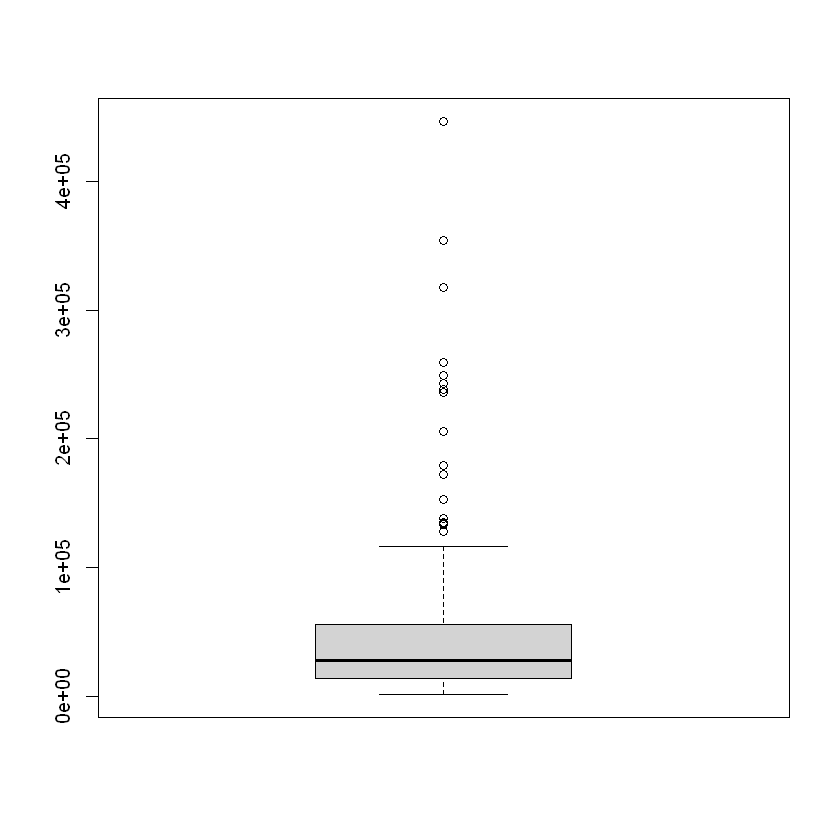

In [4]:
boxplot(df$HospCharges)

In [5]:
summary(df$HospCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514   13996   28267   48429   54737  446603 

In [38]:
upper.fence <- summary(df$HospCharges)[['3rd Qu.']] + 1.5*IQR(df$HospCharges)

In [39]:
lower.fence <- summary(df$HospCharges)[['1st Qu.']] - 1.5*IQR(df$HospCharges)

In [43]:
paste('IQR: ',IQR(df$HospCharges))
paste('Upper Fence: ',upper.fence)
paste('Lower Fence: ',lower.fence)

[1] "IQR:  40741.75"

[1] "Upper Fence:  115849.875"

[1] "Lower Fence:  -47117.125"

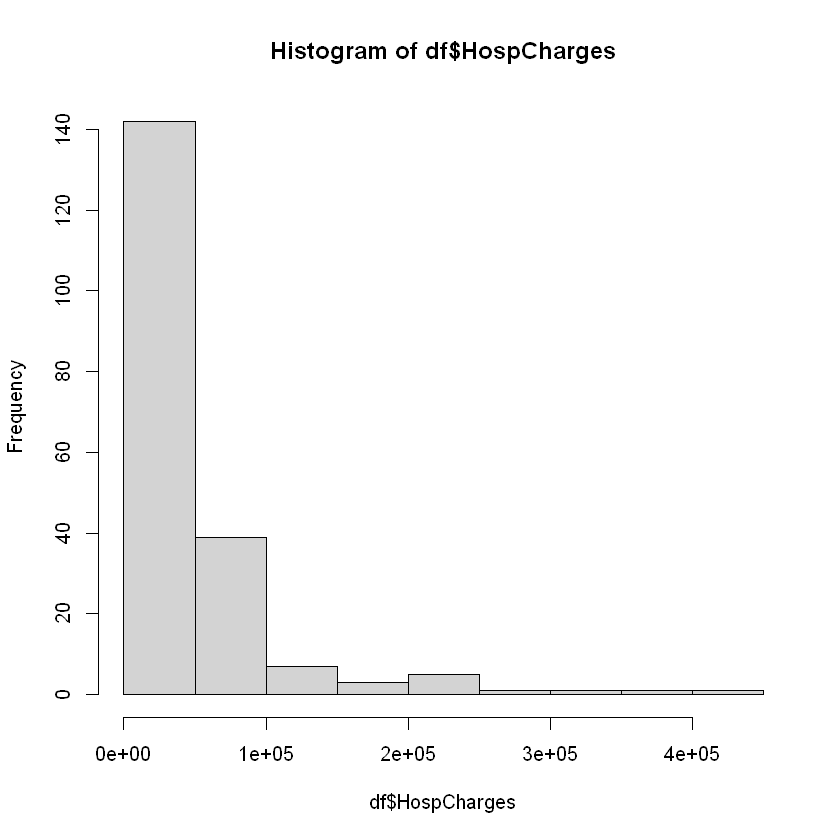

In [85]:
hist(df$HospCharges)

In [96]:
ind <- df |> select(-c('HospCharges','Weight'))

In [97]:
cor_mat(ind, method='spearman')

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.0000,0.1200,-0.38000,0.5700,-0.190,-0.27000,-0.120,-0.0059
2,Income_Zip,0.1200,1.0000,0.10000,-0.0064,-0.036,-0.06100,0.062,-0.3400
3,Insurance,-0.3800,0.1000,1.00000,-0.4400,0.056,0.00045,0.039,-0.0056
4,Number_Diagnoses,0.5700,-0.0064,-0.44000,1.0000,0.023,-0.14000,-0.048,-0.0070
5,Number_Procedures,-0.1900,-0.0360,0.05600,0.0230,1.000,0.03200,0.055,-0.1400
6,Race,-0.2700,-0.0610,0.00045,-0.1400,0.032,1.00000,0.100,-0.1700
7,Sex,-0.1200,0.0620,0.03900,-0.0480,0.055,0.10000,1.000,-0.0320
8,Urban_Rural,-0.0059,-0.3400,-0.00560,-0.0070,-0.140,-0.17000,-0.032,1.0000


In [98]:
cor_get_pval(cor_mat(ind, method='spearman'))

rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00e+00,9.01e-02,2.43e-08,6.01e-19,0.00676,0.000134,0.0952,9.34e-01
Income_Zip,9.01e-02,0.00e+00,1.54e-01,9.29e-01,0.61600,0.403000,0.3900,1.06e-06
Insurance,2.43e-08,1.54e-01,0.00e+00,1.12e-10,0.43400,0.995000,0.5880,9.38e-01
Number_Diagnoses,6.01e-19,9.29e-01,1.12e-10,0.00e+00,0.74400,0.045100,0.5030,9.21e-01
Number_Procedures,6.76e-03,6.16e-01,4.34e-01,7.44e-01,0.00000,0.655000,0.4420,5.54e-02
Race,1.34e-04,4.03e-01,9.95e-01,4.51e-02,0.65500,0.000000,0.1420,1.43e-02
Sex,9.52e-02,3.90e-01,5.88e-01,5.03e-01,0.44200,0.142000,0.0000,6.53e-01
Urban_Rural,9.34e-01,1.06e-06,9.38e-01,9.21e-01,0.05540,0.014300,0.6530,0.00e+00


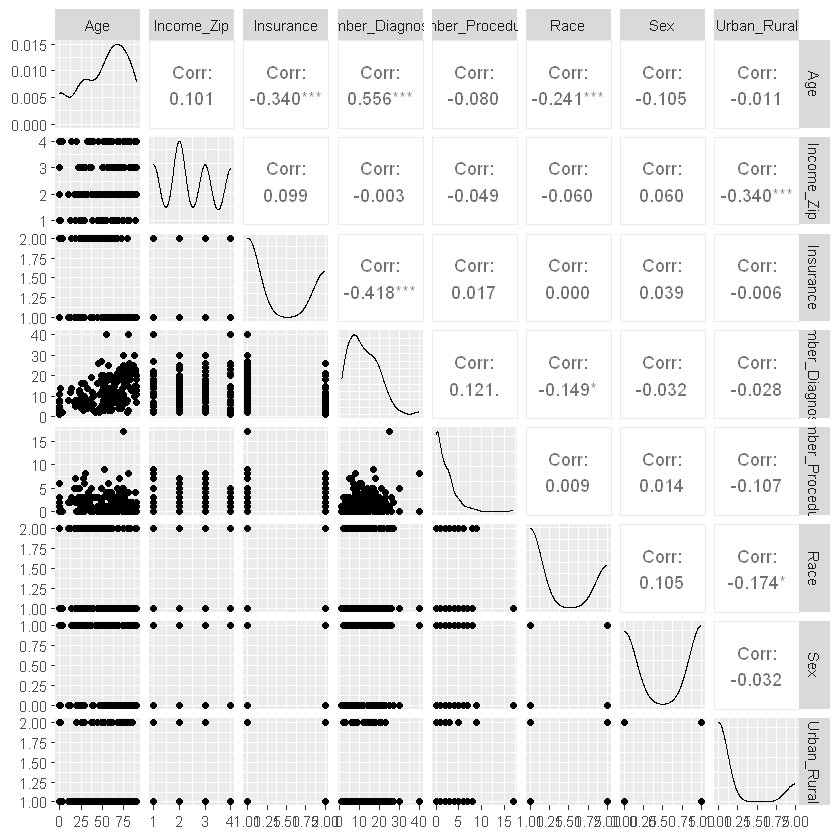

In [99]:
suppressWarnings(print(ggpairs(ind)))

In [105]:
mod1 <- lm(HospCharges ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df)

In [108]:
summary(mod1)


Call:
lm(formula = HospCharges ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-115829  -22328   -6629   13706  237839 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8184.4    29038.2  -0.282    0.778    
Age                  134.8      169.1   0.797    0.427    
Income_Zip          1180.5     3635.5   0.325    0.746    
Insurance           3321.1     8352.3   0.398    0.691    
Number_Diagnoses    2715.4      627.1   4.330 2.45e-05 ***
Number_Procedures  13967.8     1935.5   7.217 1.37e-11 ***
Race                1342.8     7975.3   0.168    0.866    
Sex                -9760.0     7190.1  -1.357    0.176    
Urban_Rural       -10274.8    10316.7  -0.996    0.321    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49140 on 183 degrees of freedom
  (8 observations deleted due 

In [113]:
data.frame(vif(mod1))

,vif.mod1.
,<dbl>
Age,1.704414
Income_Zip,1.188161
Insurance,1.292405
Number_Diagnoses,1.681573
Number_Procedures,1.073313
Race,1.140656
Sex,1.024648
Urban_Rural,1.204302


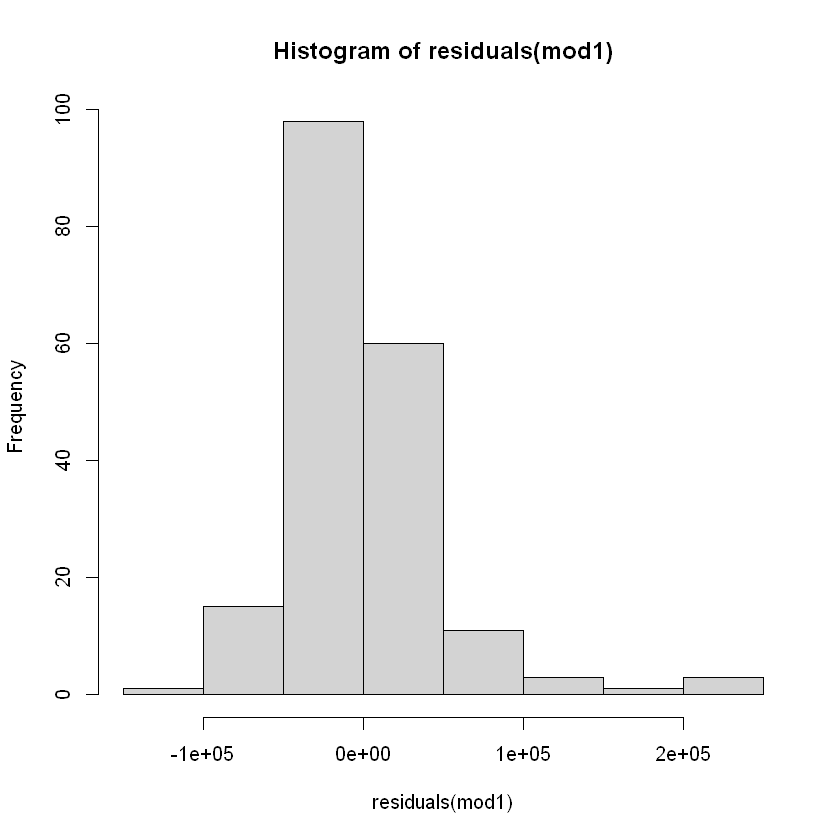

In [114]:
hist(residuals(mod1))

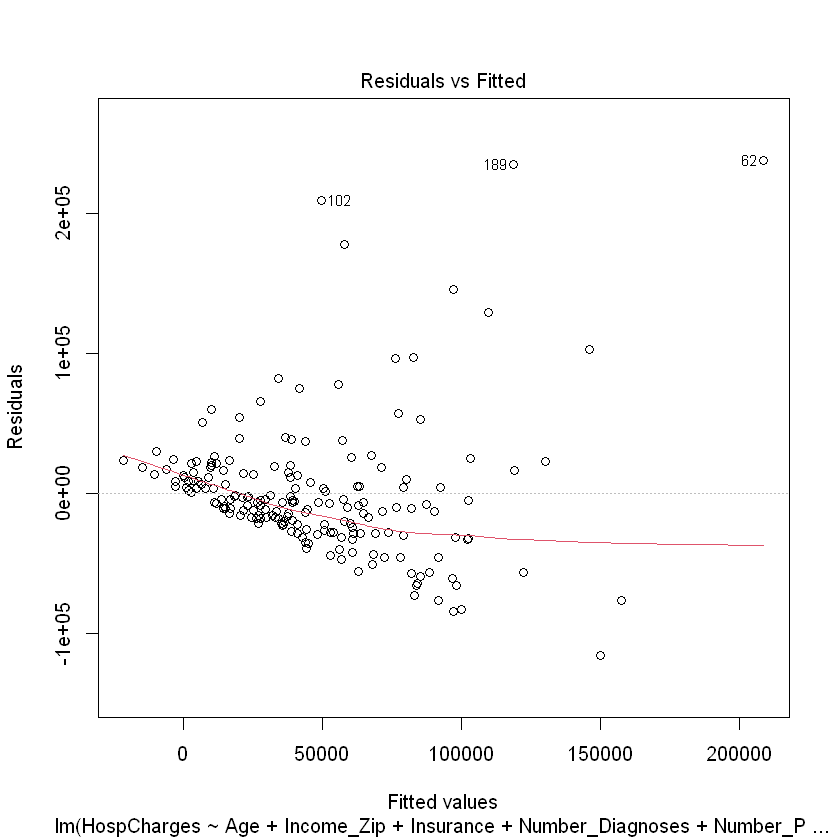

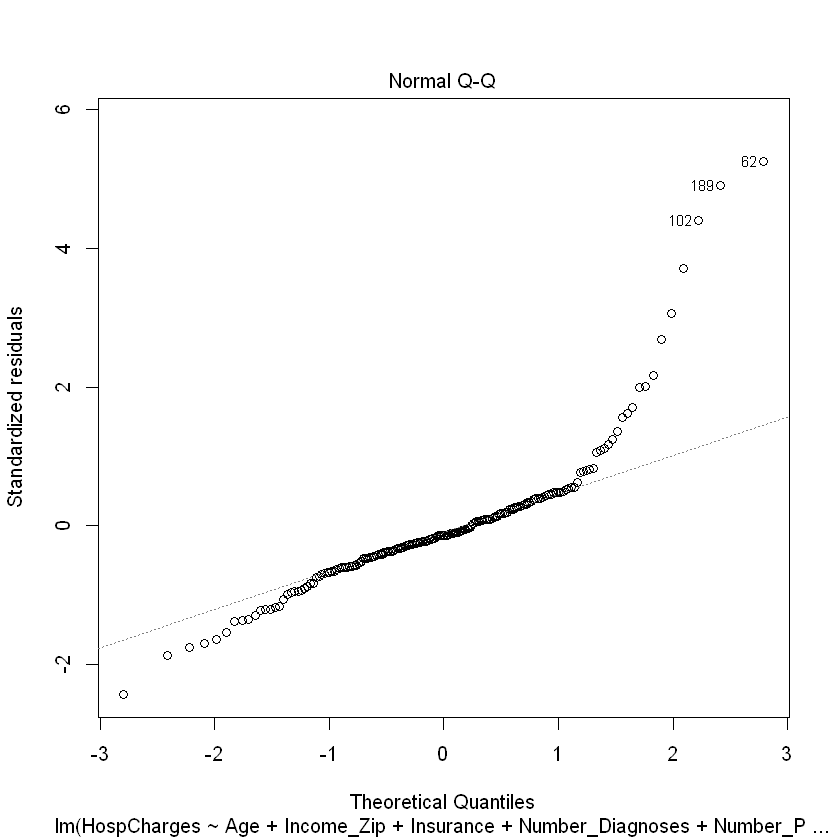

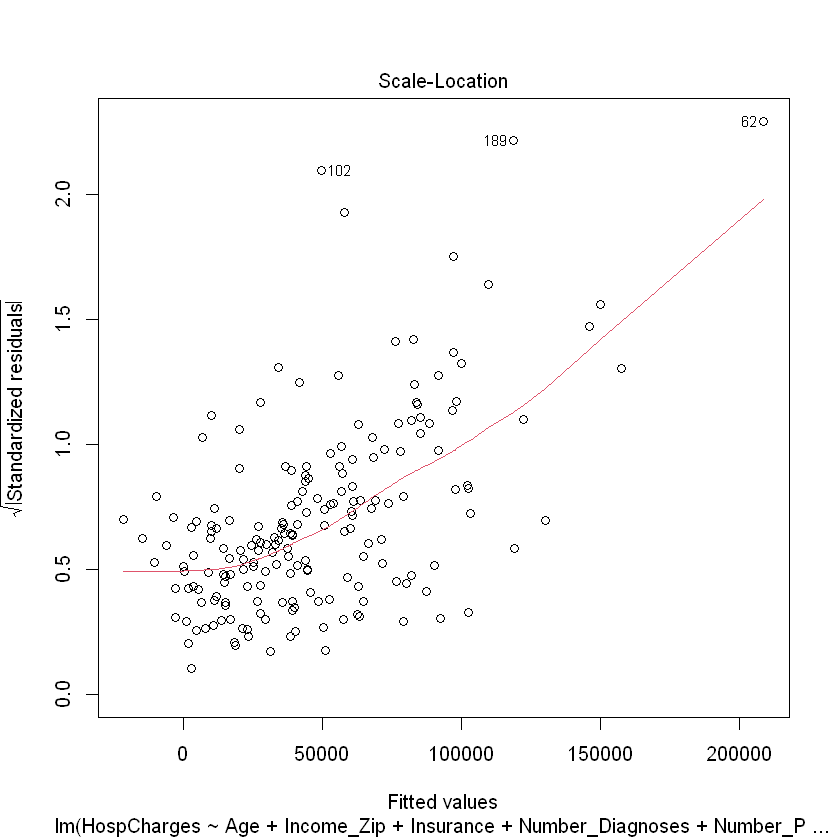

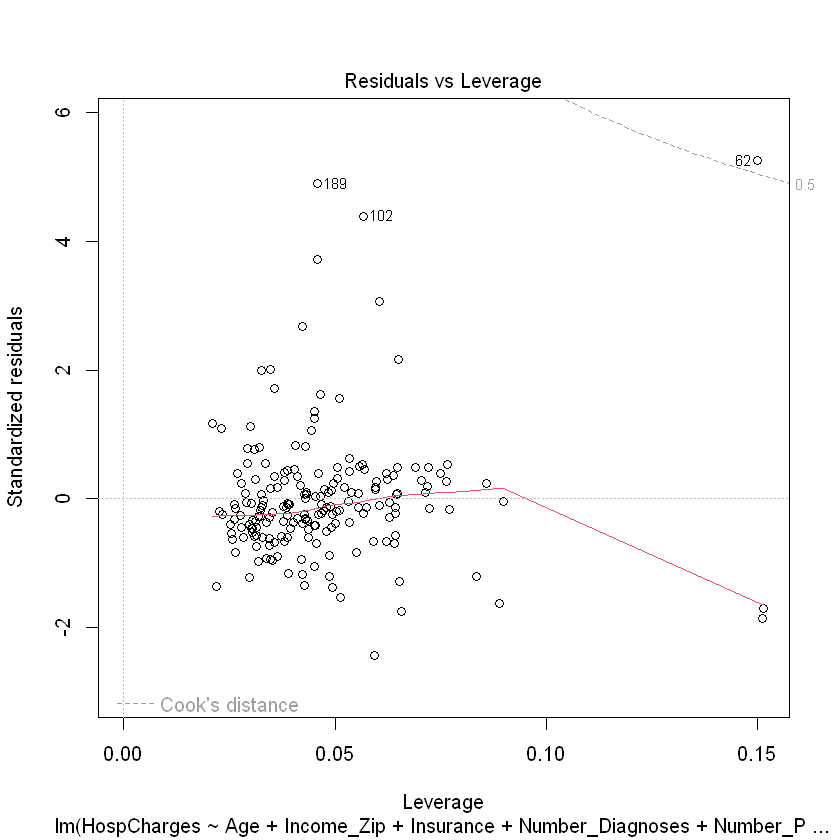

In [117]:
plot(mod1)

In [118]:
upper.fence

[1] 115849.9

In [126]:
copy.data <- df

In [127]:
df <- df[df$HospCharges < upper.fence, ]

In [128]:
ind <- df |> select(-c('HospCharges','Weight'))

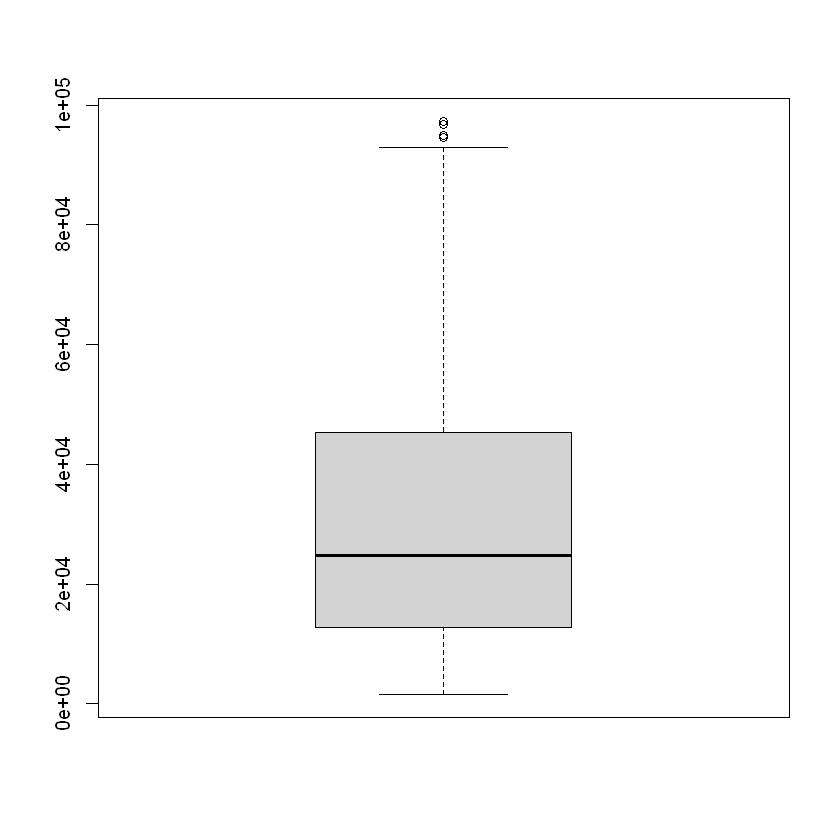

In [130]:
boxplot(df$HospCharges)

In [131]:
cor_mat(ind,method='spearman')

,rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.120,-0.3800,0.590,-0.250,-0.2500,-0.099,0.011
2,Income_Zip,0.120,1.000,0.0810,-0.043,-0.053,-0.0470,0.076,-0.350
3,Insurance,-0.380,0.081,1.0000,-0.480,0.066,-0.0033,0.010,-0.024
4,Number_Diagnoses,0.590,-0.043,-0.4800,1.000,-0.076,-0.1300,-0.039,0.016
5,Number_Procedures,-0.250,-0.053,0.0660,-0.076,1.000,0.0840,0.120,-0.110
6,Race,-0.250,-0.047,-0.0033,-0.130,0.084,1.0000,0.058,-0.190
7,Sex,-0.099,0.076,0.0100,-0.039,0.120,0.0580,1.000,-0.036
8,Urban_Rural,0.011,-0.350,-0.0240,0.016,-0.110,-0.1900,-0.036,1.000


In [132]:
cor_get_pval(cor_mat(ind,method='spearman'))

rowname,Age,Income_Zip,Insurance,Number_Diagnoses,Number_Procedures,Race,Sex,Urban_Rural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00e+00,1.12e-01,1.90e-07,3.82e-18,0.000656,0.000683,0.185,8.83e-01
Income_Zip,1.12e-01,0.00e+00,2.81e-01,5.72e-01,0.481000,0.533000,0.314,1.49e-06
Insurance,1.90e-07,2.81e-01,0.00e+00,8.48e-12,0.376000,0.965000,0.894,7.46e-01
Number_Diagnoses,3.82e-18,5.72e-01,8.48e-12,0.00e+00,0.312000,0.081900,0.604,8.29e-01
Number_Procedures,6.56e-04,4.81e-01,3.76e-01,3.12e-01,0.000000,0.265000,0.101,1.38e-01
Race,6.83e-04,5.33e-01,9.65e-01,8.19e-02,0.265000,0.000000,0.439,1.32e-02
Sex,1.85e-01,3.14e-01,8.94e-01,6.04e-01,0.101000,0.439000,0.000,6.32e-01
Urban_Rural,8.83e-01,1.49e-06,7.46e-01,8.29e-01,0.138000,0.013200,0.632,0.00e+00


In [133]:
mod2 <- lm(HospCharges ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df)

In [134]:
summary(mod2)


Call:
lm(formula = HospCharges ~ Age + Income_Zip + Insurance + Number_Diagnoses + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-38265 -12599  -2936   9725  61391 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5959.5    12990.8  -0.459 0.647014    
Age                  274.3       75.4   3.638 0.000366 ***
Income_Zip           866.8     1605.5   0.540 0.589986    
Insurance           1151.3     3764.4   0.306 0.760120    
Number_Diagnoses     695.6      297.2   2.340 0.020463 *  
Number_Procedures   5346.8      919.6   5.814 3.05e-08 ***
Race                4058.7     3537.1   1.147 0.252835    
Sex                -4705.5     3207.1  -1.467 0.144210    
Urban_Rural         1121.6     4440.5   0.253 0.800905    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20930 on 166 degrees of freedom
  (6 observations deleted due to missing

In [136]:
data.frame(vif(mod2))

,vif.mod2.
,<dbl>
Age,1.715830
Income_Zip,1.192972
Insurance,1.321871
Number_Diagnoses,1.725487
Number_Procedures,1.057534
Race,1.135008
Sex,1.021676
Urban_Rural,1.205459


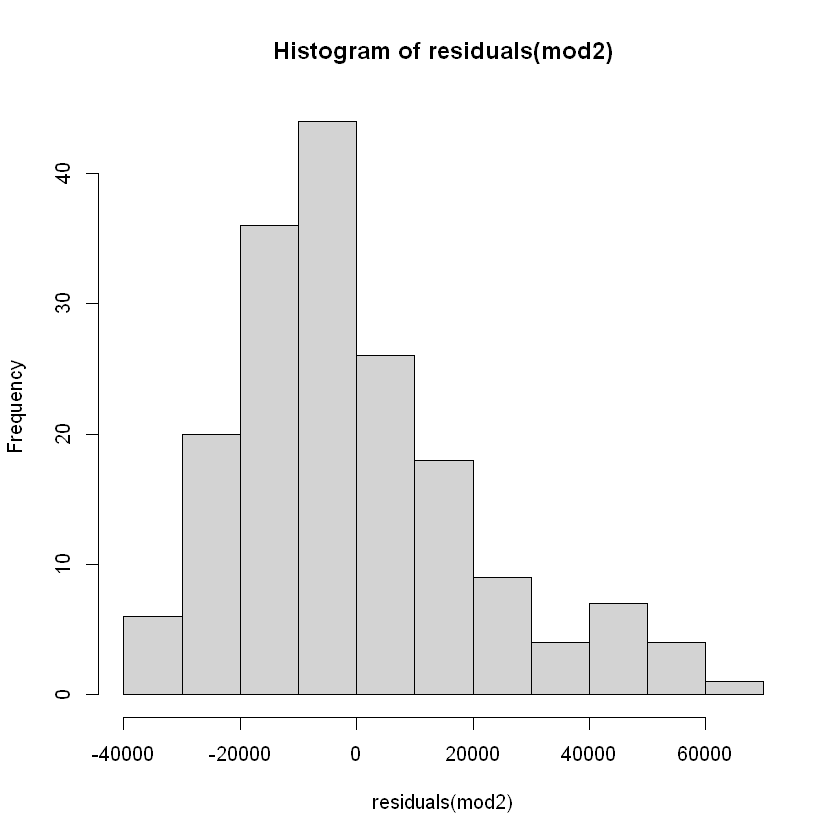

In [138]:
hist(residuals(mod2))

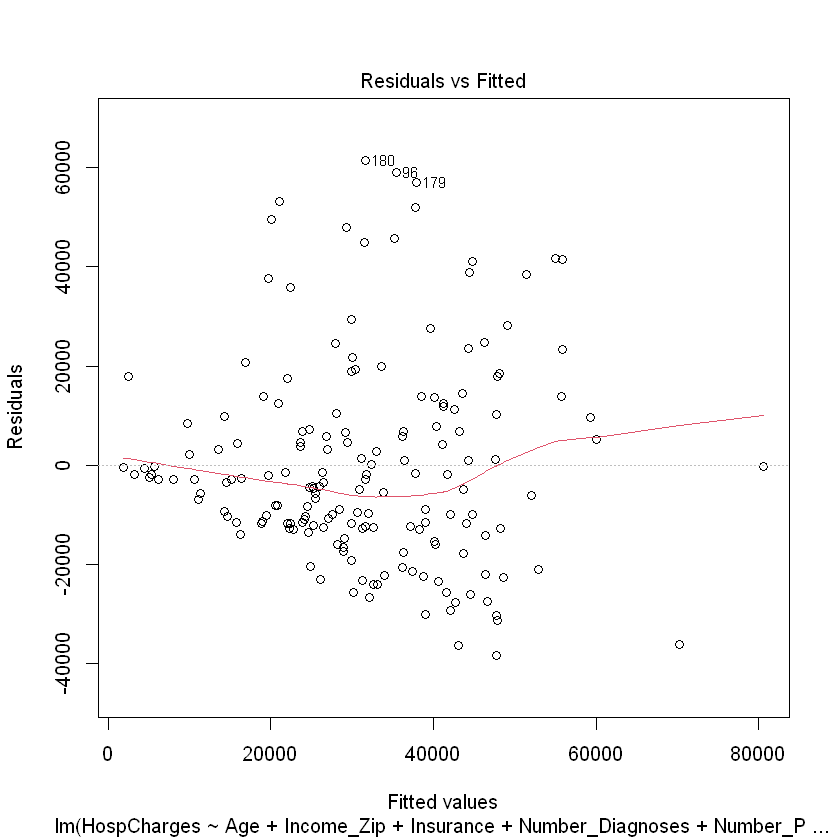

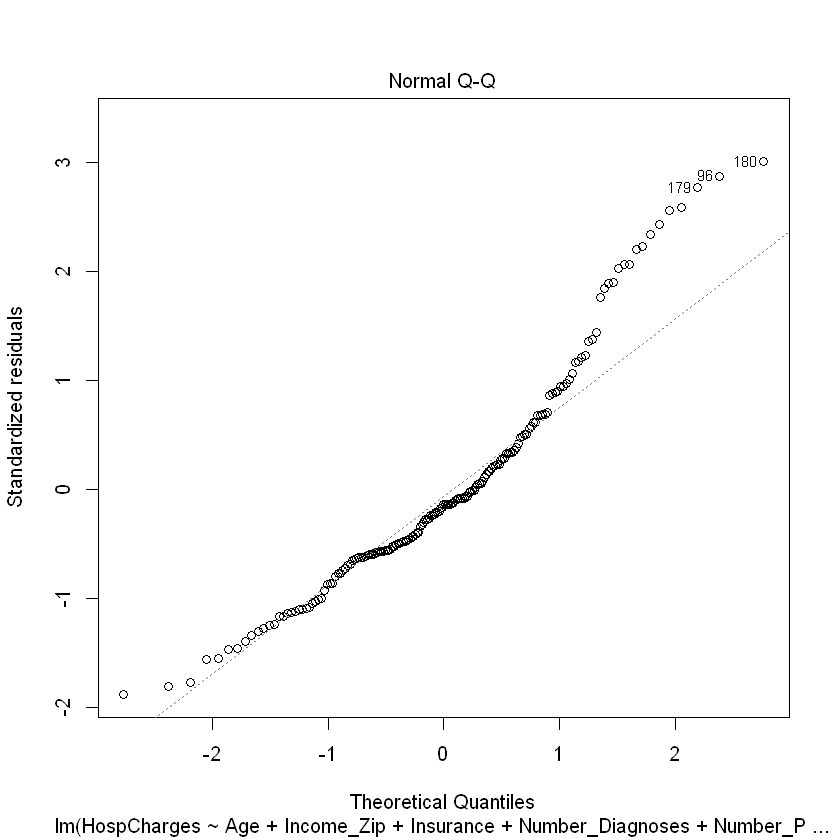

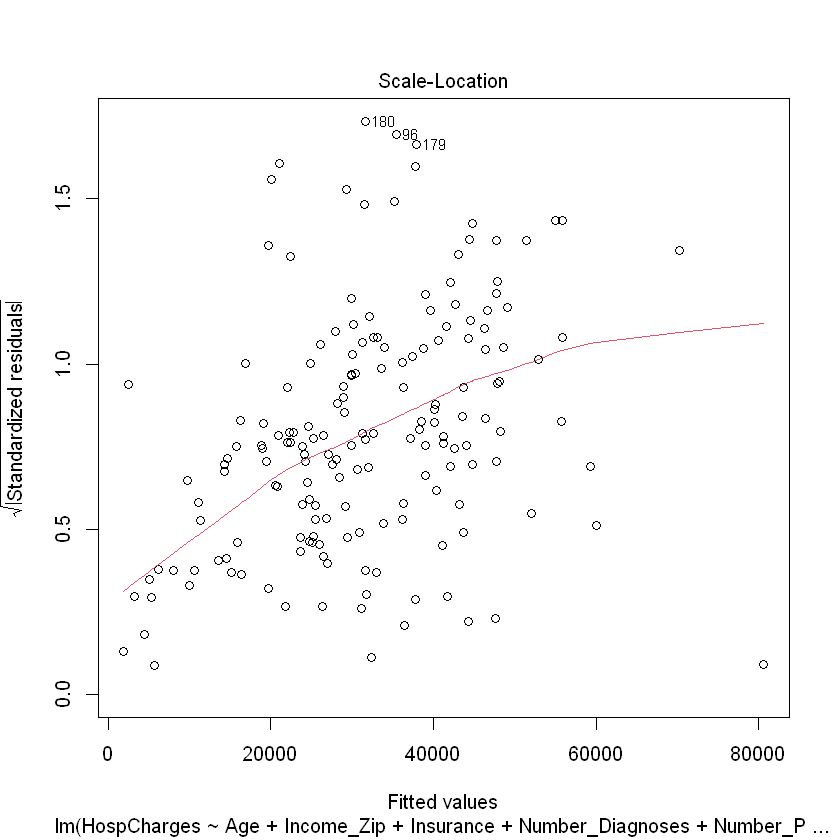

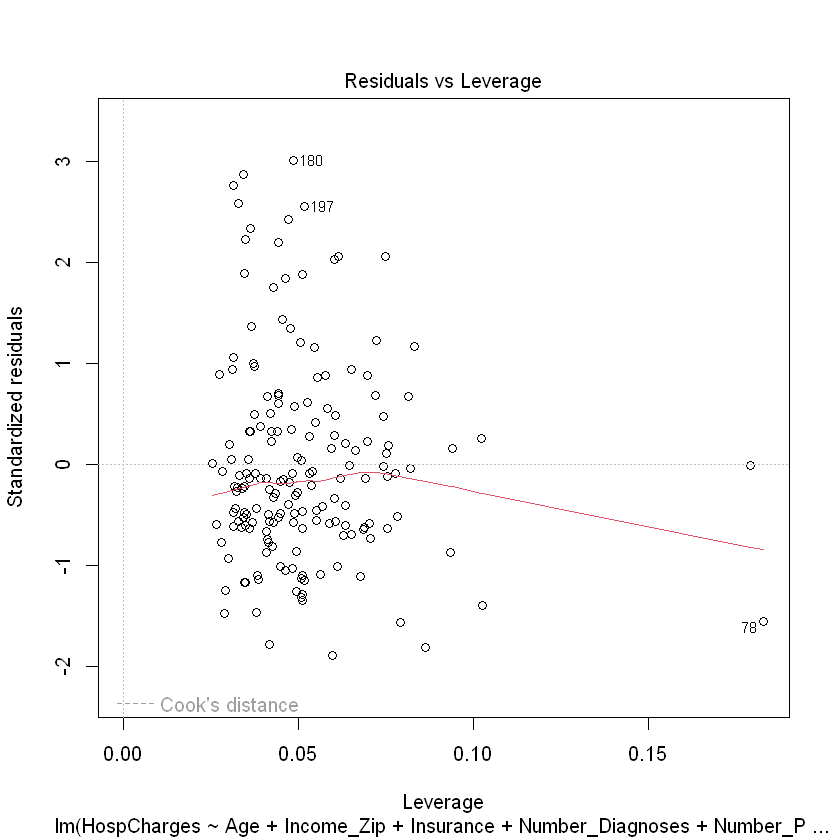

In [137]:
plot(mod2)

In [141]:
mod3 <- lm(sqrt(HospCharges) ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df)

In [142]:
summary(mod3)


Call:
lm(formula = sqrt(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.187  -34.619   -7.634   33.860  141.092 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        48.2059    34.5263   1.396  0.16452    
Age                 0.9351     0.2004   4.667 6.28e-06 ***
Income_Zip          1.1602     4.2671   0.272  0.78605    
Insurance           6.9660    10.0050   0.696  0.48725    
Number_Diagnoses    2.1808     0.7900   2.760  0.00642 ** 
Number_Procedures  14.2385     2.4442   5.825 2.88e-08 ***
Race               13.2521     9.4006   1.410  0.16050    
Sex                -9.8045     8.5236  -1.150  0.25169    
Urban_Rural        -1.3380    11.8018  -0.113  0.90987    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.62 on 166 degrees of freedom
  (6 obse

In [144]:
data.frame(vif(mod3))

,vif.mod3.
,<dbl>
Age,1.715830
Income_Zip,1.192972
Insurance,1.321871
Number_Diagnoses,1.725487
Number_Procedures,1.057534
Race,1.135008
Sex,1.021676
Urban_Rural,1.205459


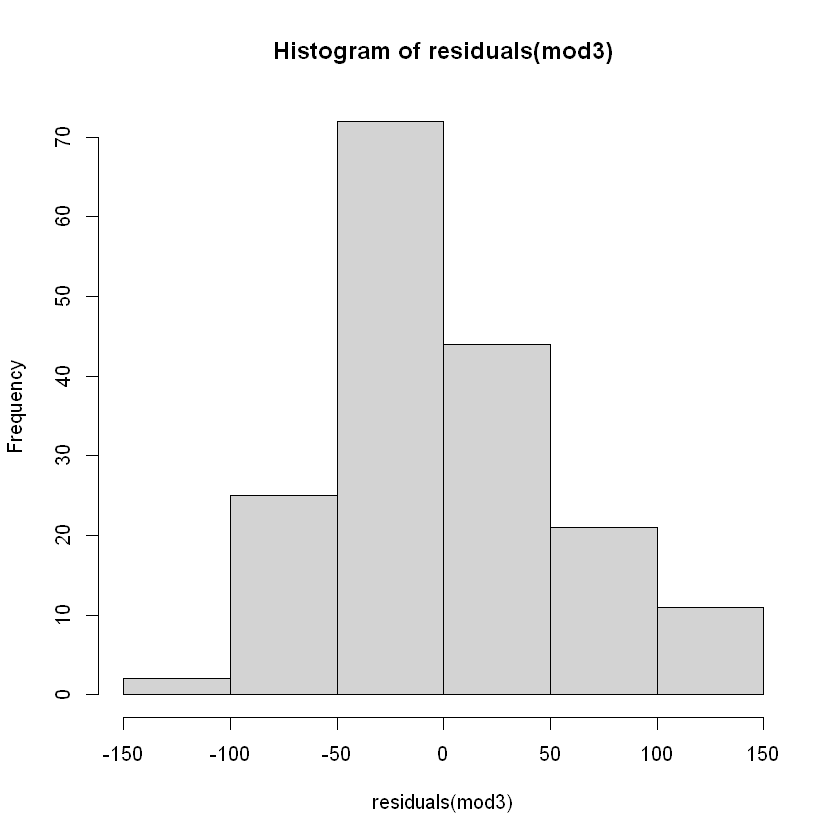

In [145]:
hist(residuals(mod3))

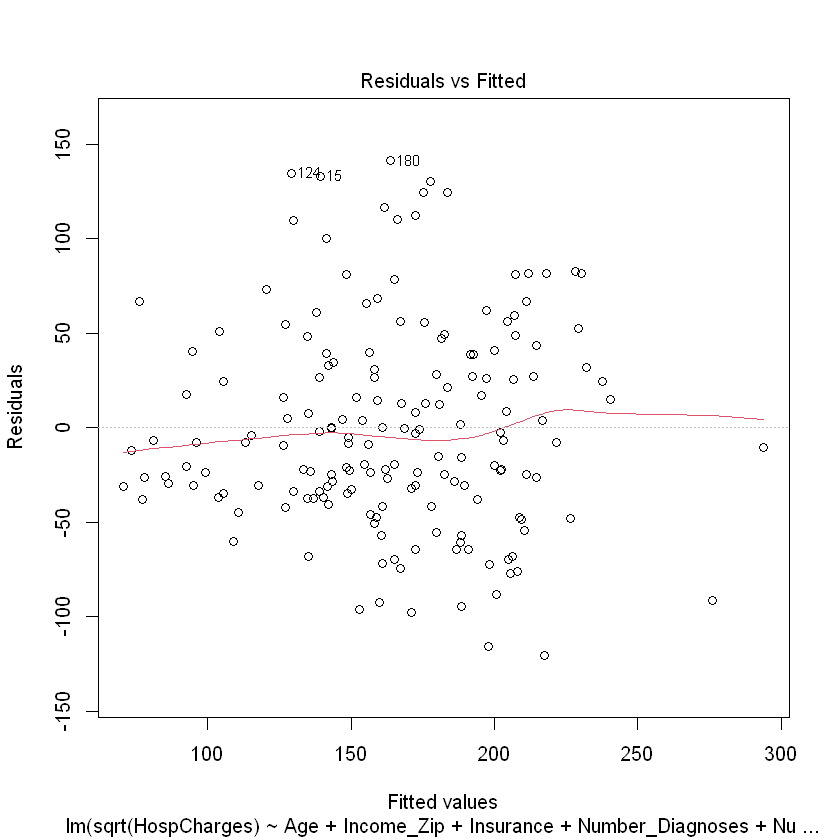

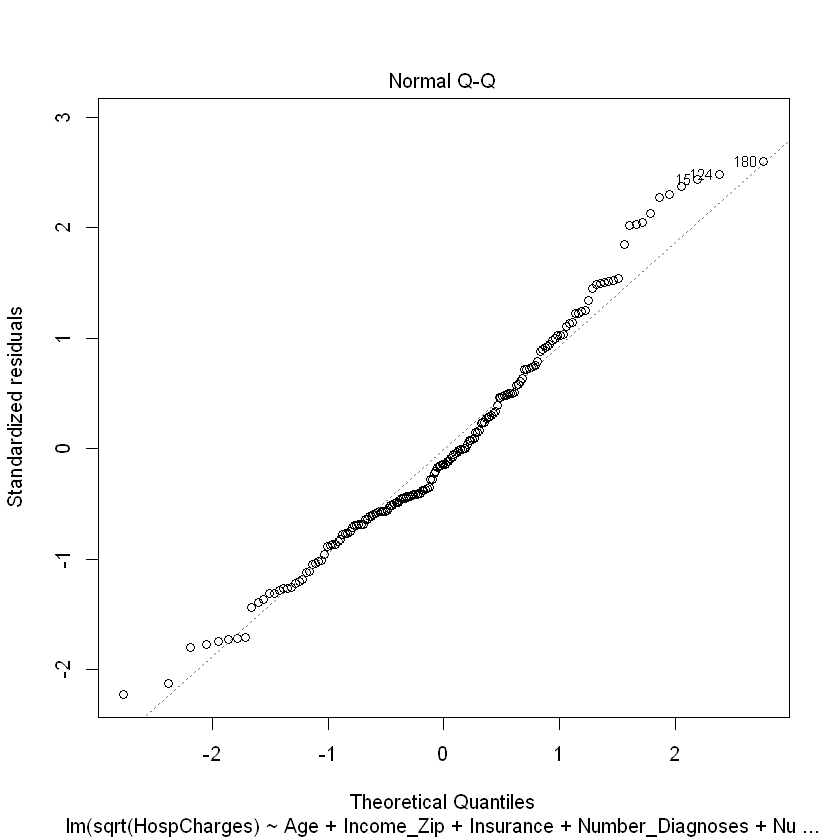

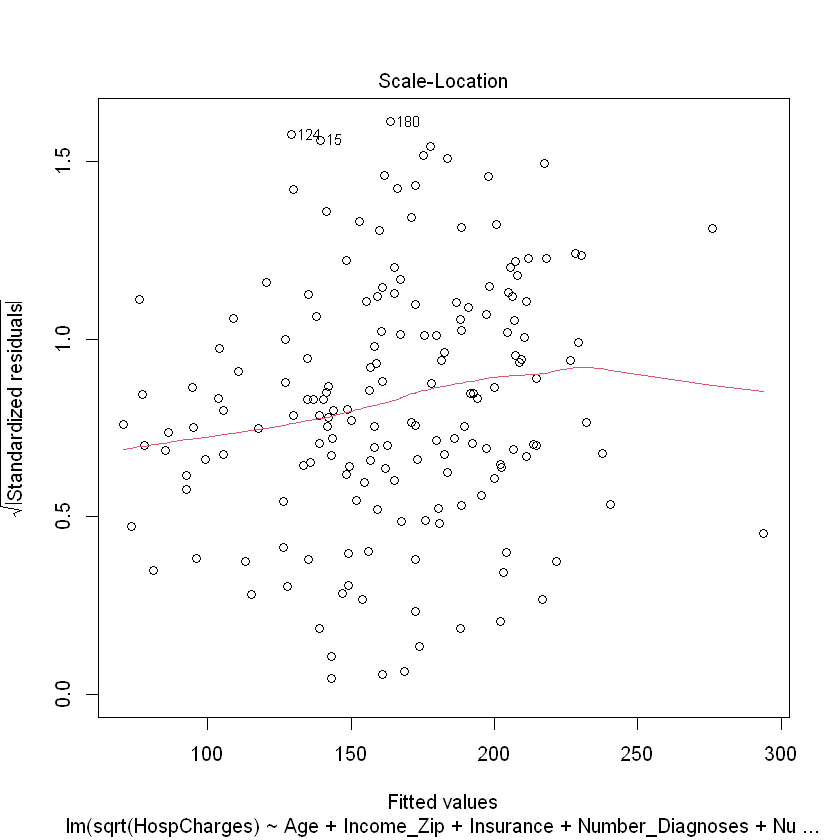

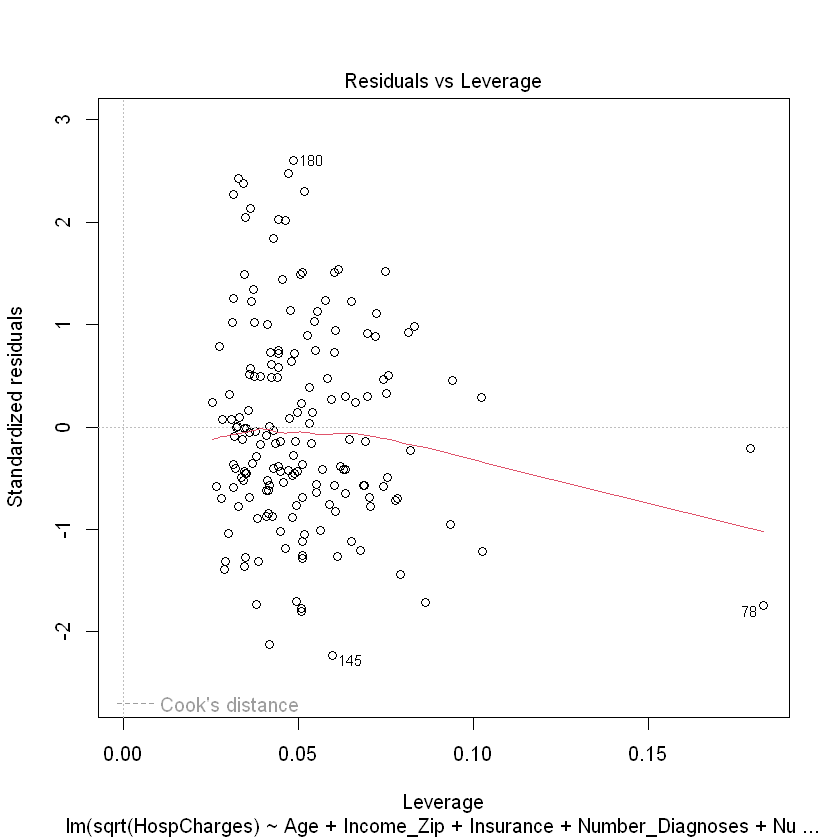

In [146]:
plot(mod3)


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87180 -0.44495 -0.01999  0.50342  1.63931 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.281257   0.443654  18.666  < 2e-16 ***
Age                0.015029   0.002575   5.837 2.73e-08 ***
Income_Zip        -0.002843   0.054831  -0.052  0.95871    
Insurance          0.156661   0.128561   1.219  0.22474    
Number_Diagnoses   0.031612   0.010151   3.114  0.00217 ** 
Number_Procedures  0.173273   0.031407   5.517 1.30e-07 ***
Race               0.223346   0.120795   1.849  0.06624 .  
Sex               -0.077041   0.109526  -0.703  0.48279    
Urban_Rural       -0.086934   0.151650  -0.573  0.56725    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7147 on 166 degrees of freedom

,vif.mod4.
,<dbl>
Age,1.715830
Income_Zip,1.192972
Insurance,1.321871
Number_Diagnoses,1.725487
Number_Procedures,1.057534
Race,1.135008
Sex,1.021676
Urban_Rural,1.205459


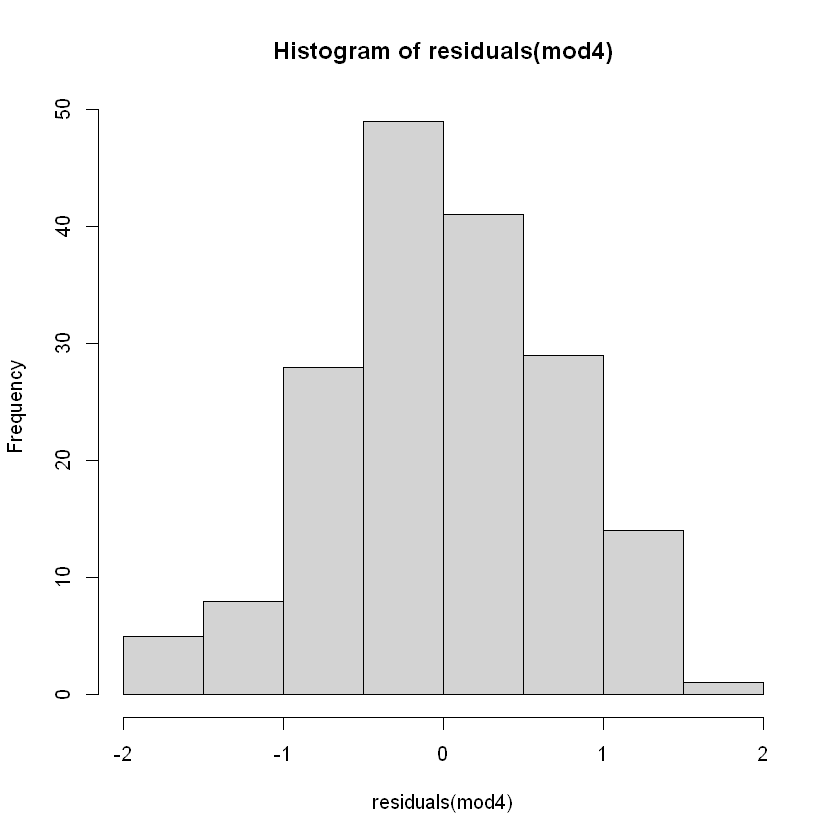

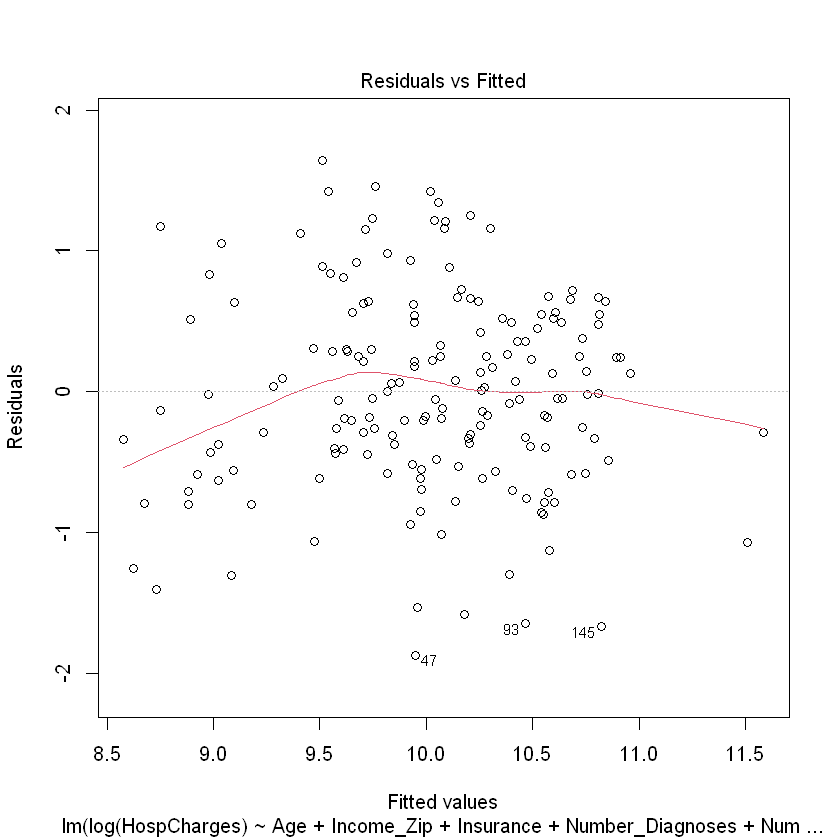

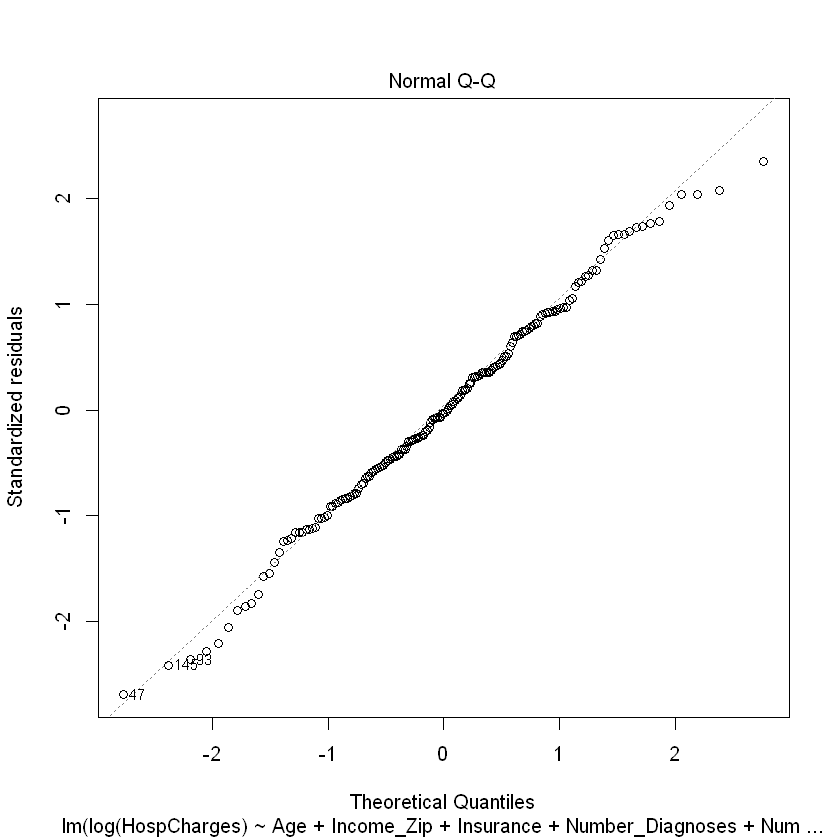

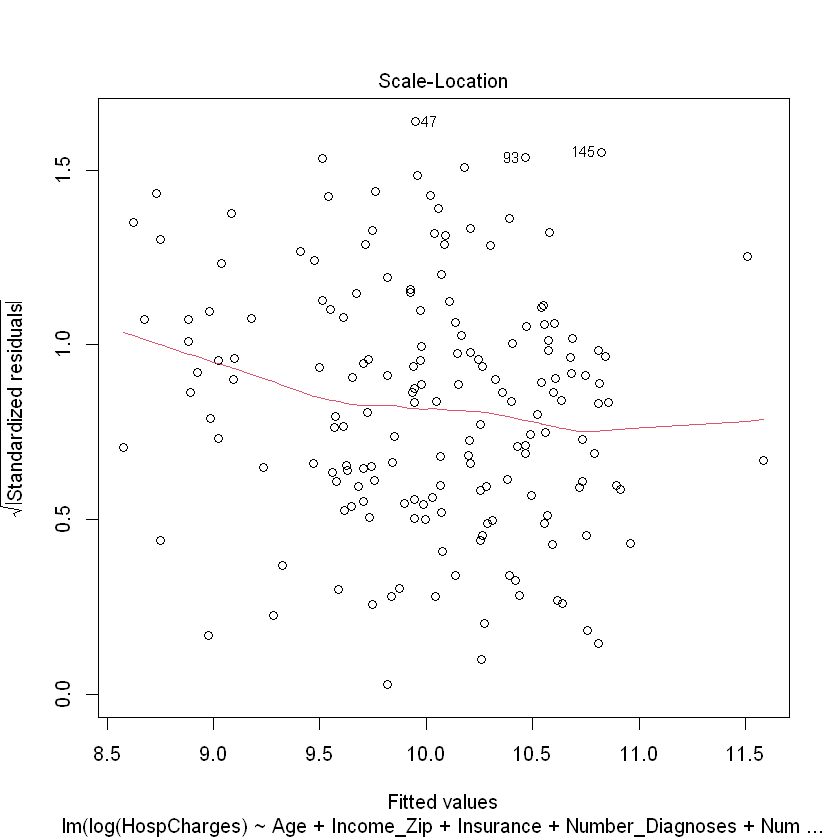

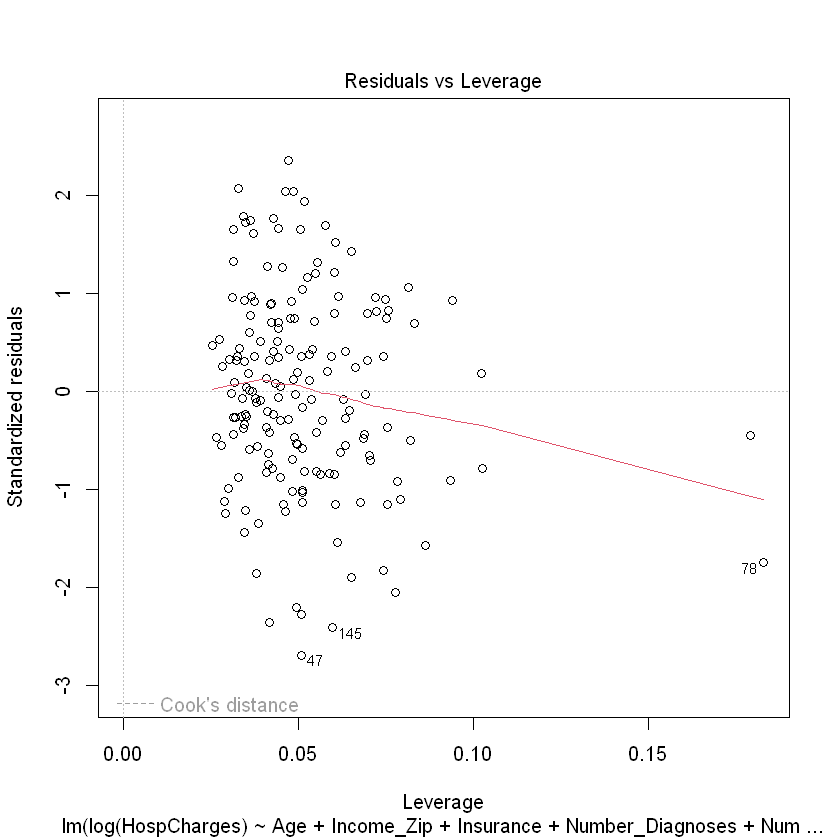

In [147]:
mod4 <- lm(log(HospCharges) ~ 
Age + Income_Zip + Insurance + Number_Diagnoses + Number_Procedures + Race + Sex + Urban_Rural
,data=df)
summary(mod4)
data.frame(vif(mod4))
hist(residuals(mod4))
plot(mod4)


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01193 -0.47270  0.04177  0.47986  1.62857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.647040   0.438821  19.705  < 2e-16 ***
Age                0.019010   0.002293   8.292 3.53e-14 ***
Income_Zip        -0.013322   0.056135  -0.237   0.8127    
Insurance          0.028402   0.124916   0.227   0.8204    
Number_Procedures  0.178745   0.032164   5.557 1.06e-07 ***
Race               0.217536   0.123886   1.756   0.0809 .  
Sex               -0.077407   0.112342  -0.689   0.4918    
Urban_Rural       -0.088380   0.155548  -0.568   0.5707    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7331 on 167 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3748,	Adjusted

,vif.mod5.
,<dbl>
Age,1.292835
Income_Zip,1.188479
Insurance,1.186200
Number_Procedures,1.054223
Race,1.134737
Sex,1.021675
Urban_Rural,1.205447


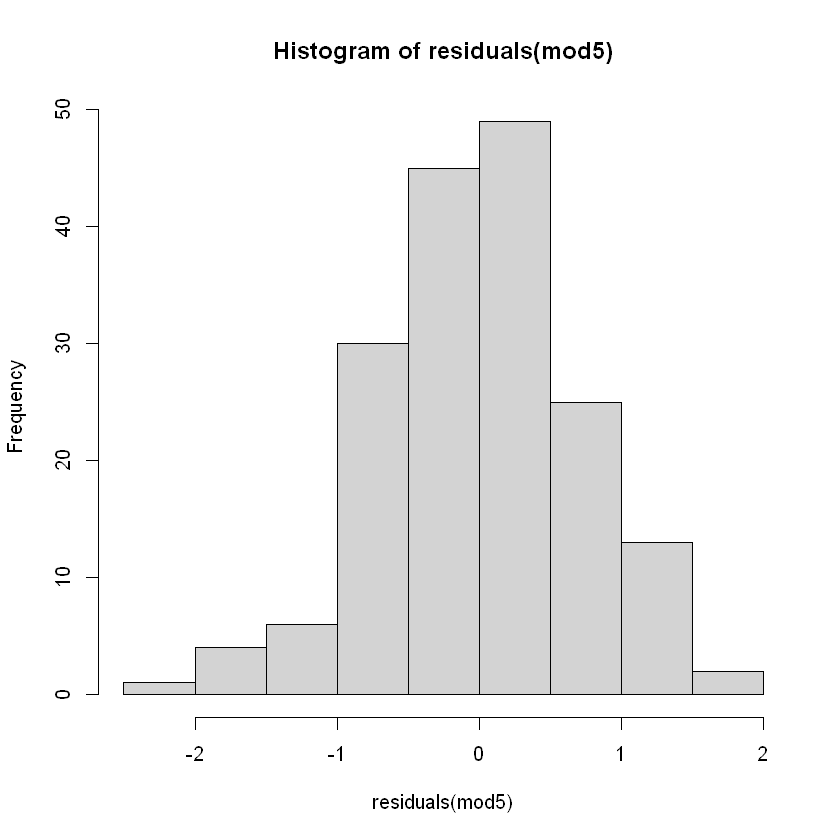

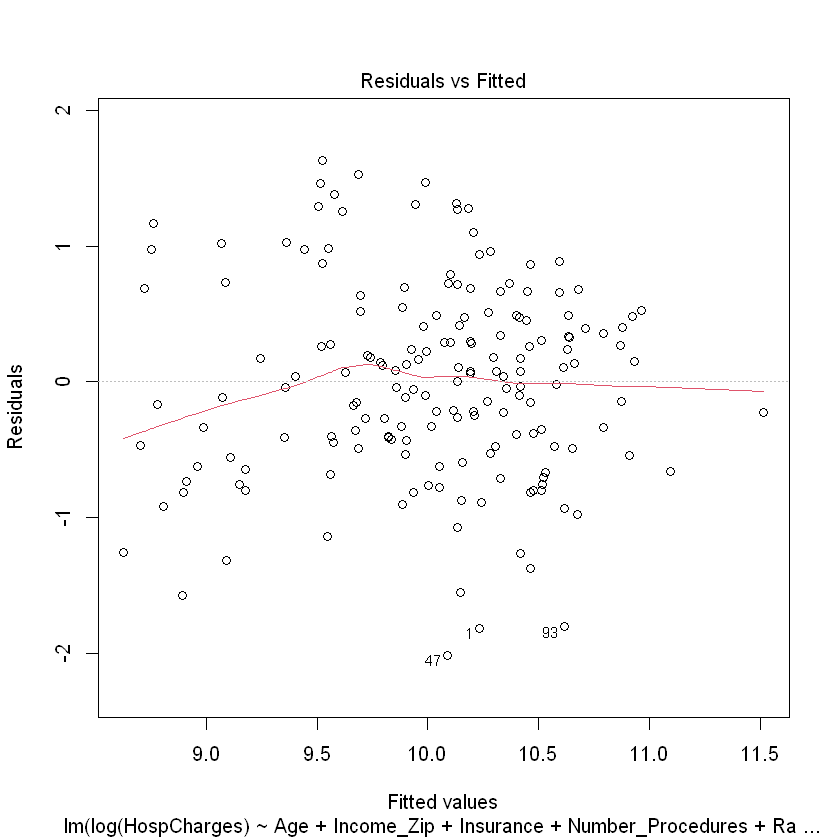

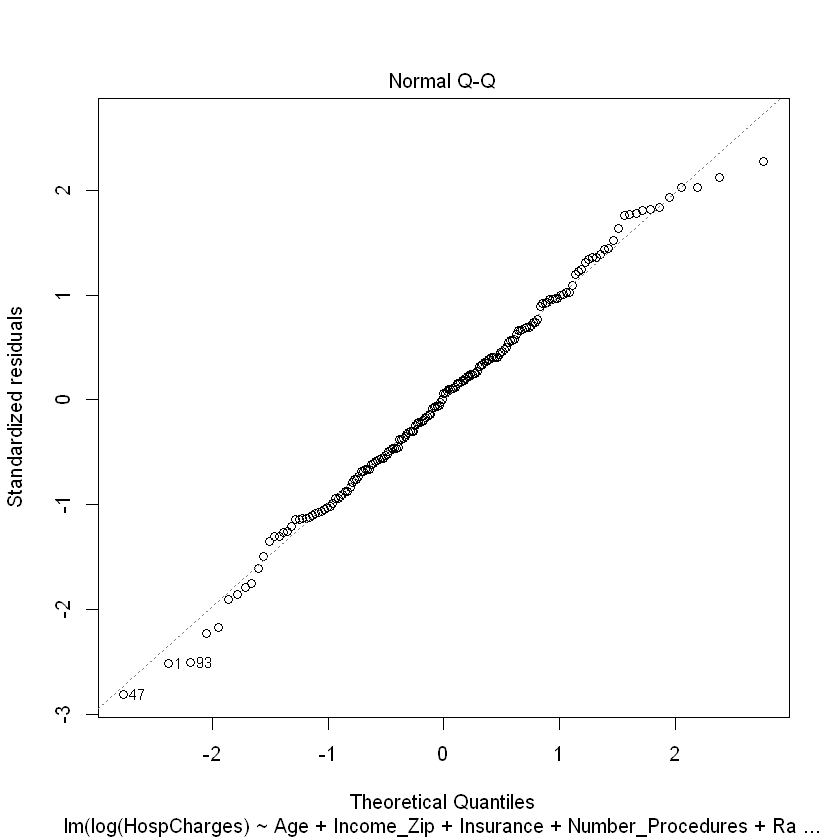

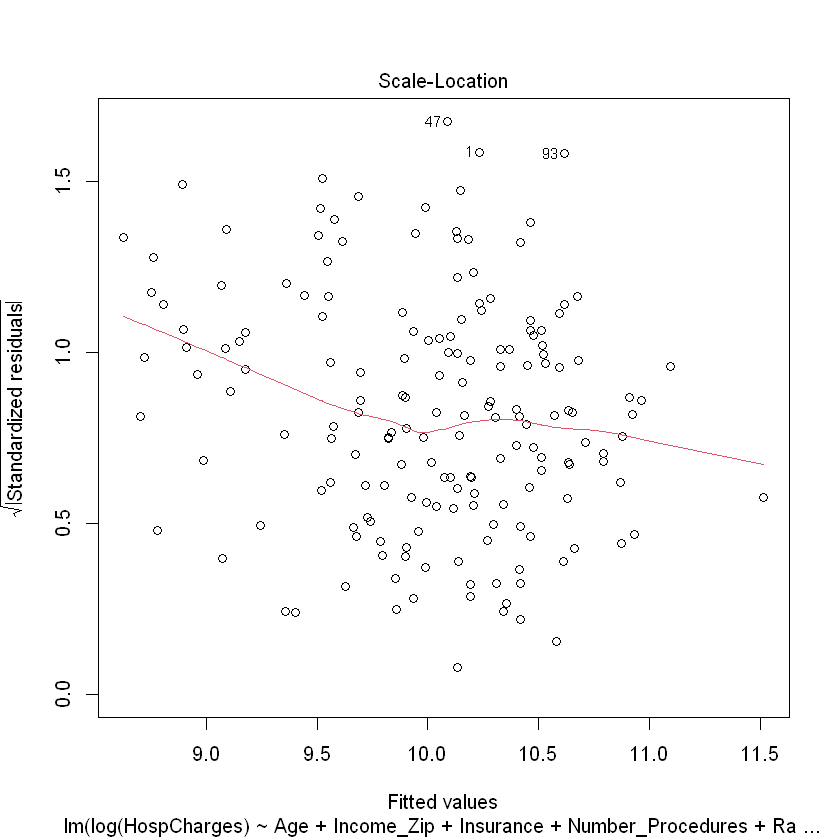

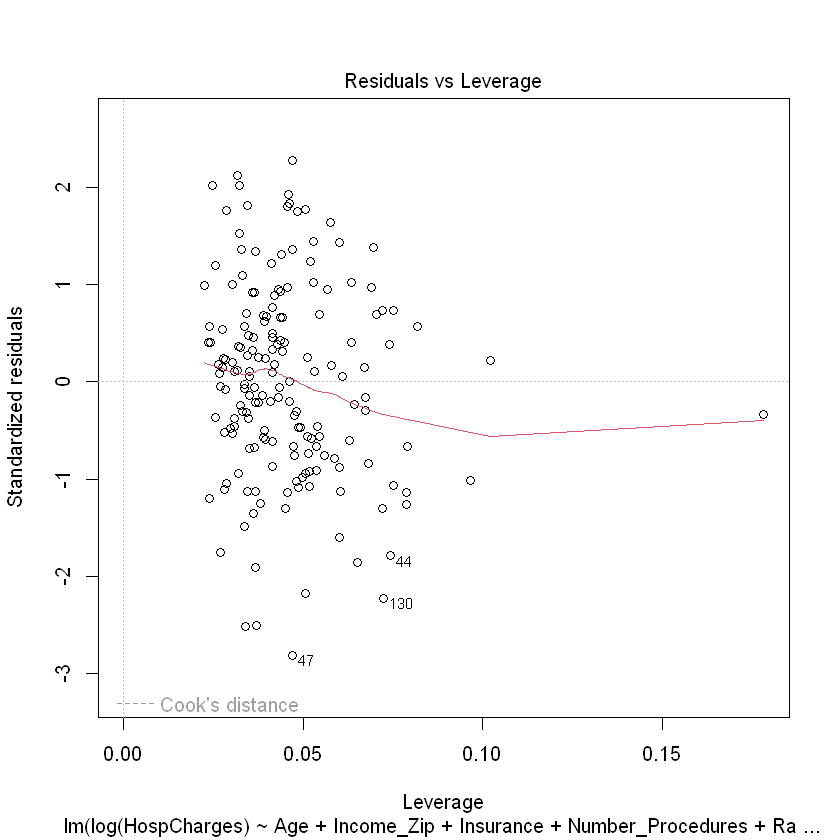

In [149]:
mod5 <- lm(log(HospCharges) ~ 
    Age + 
    Income_Zip + 
    Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
)
summary(mod5)
data.frame(vif(mod5))
hist(residuals(mod5))
plot(mod5)


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Number_Procedures + 
    Race + Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00115 -0.47592  0.04616  0.46874  1.63527 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.645534   0.373423  23.152  < 2e-16 ***
Age                0.018947   0.002104   9.007 4.34e-16 ***
Income_Zip        -0.010016   0.055453  -0.181   0.8569    
Number_Procedures  0.180085   0.031982   5.631 7.34e-08 ***
Race               0.229277   0.121346   1.889   0.0605 .  
Sex               -0.085048   0.111430  -0.763   0.4464    
Urban_Rural       -0.067445   0.152110  -0.443   0.6580    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7301 on 169 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.378,	Adjusted R-squared:  0.3559 
F-statistic: 17.12 on 6 and 169 DF,  p-value: 2.059e

,vif.mod6.
,<dbl>
Age,1.100426
Income_Zip,1.170487
Number_Procedures,1.051501
Race,1.109417
Sex,1.020208
Urban_Rural,1.190764


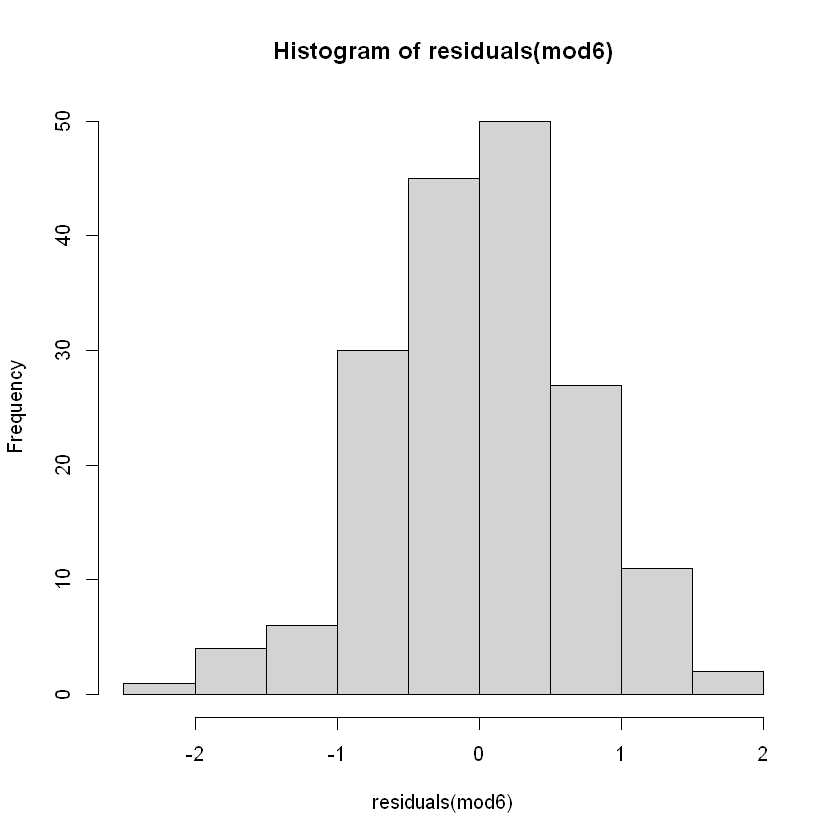

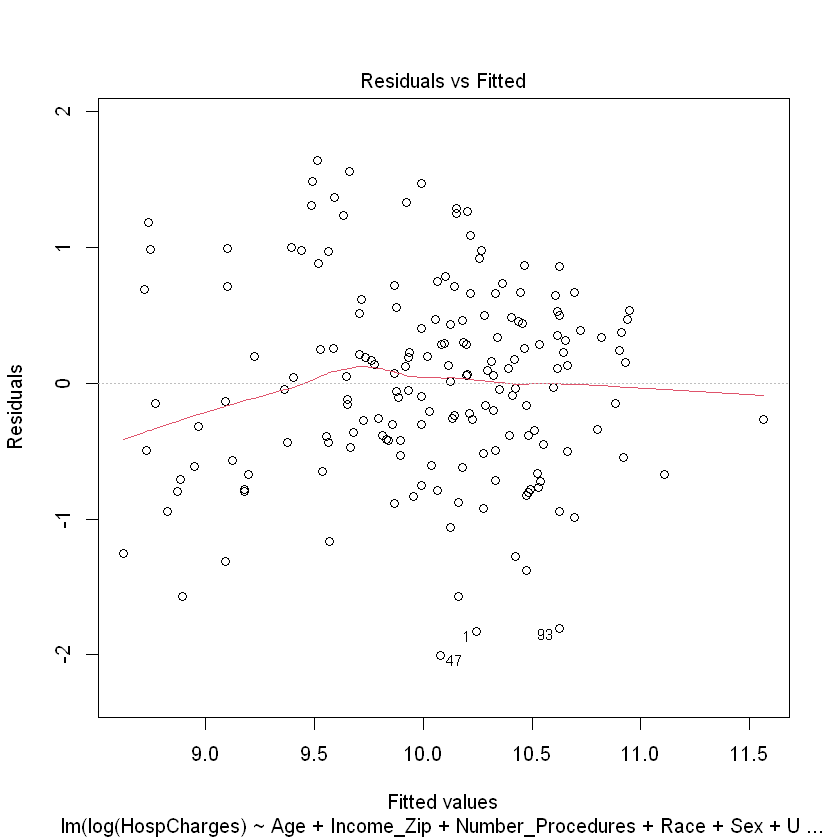

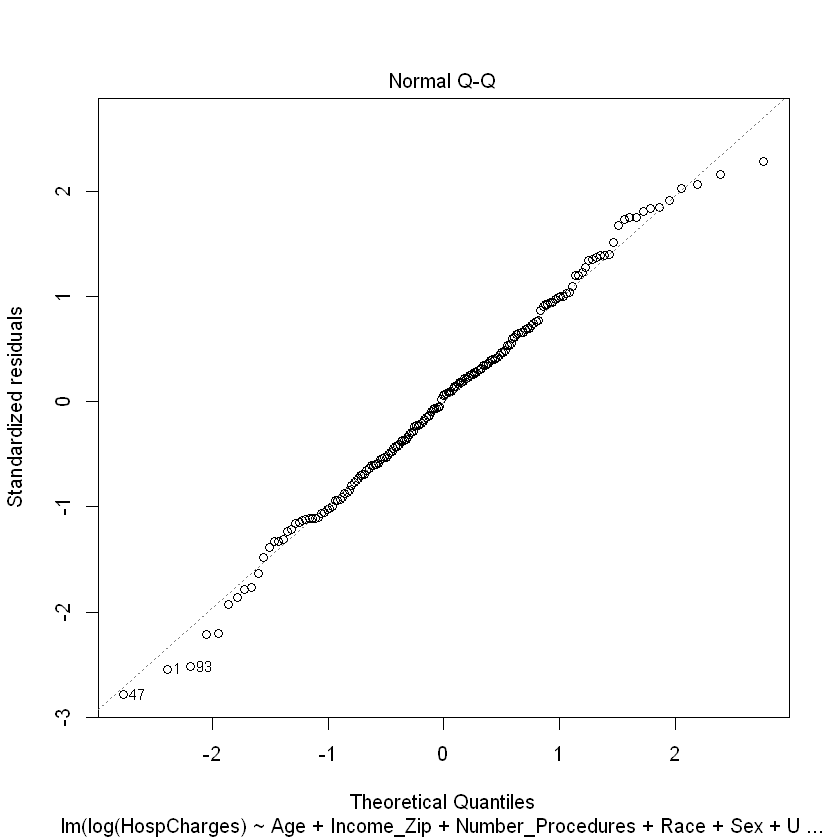

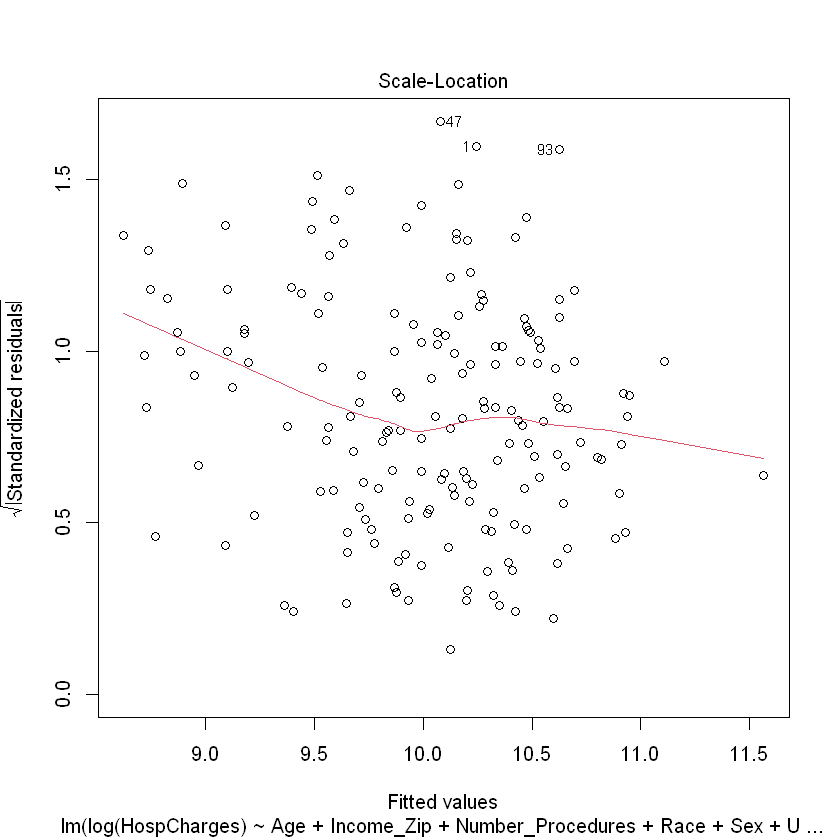

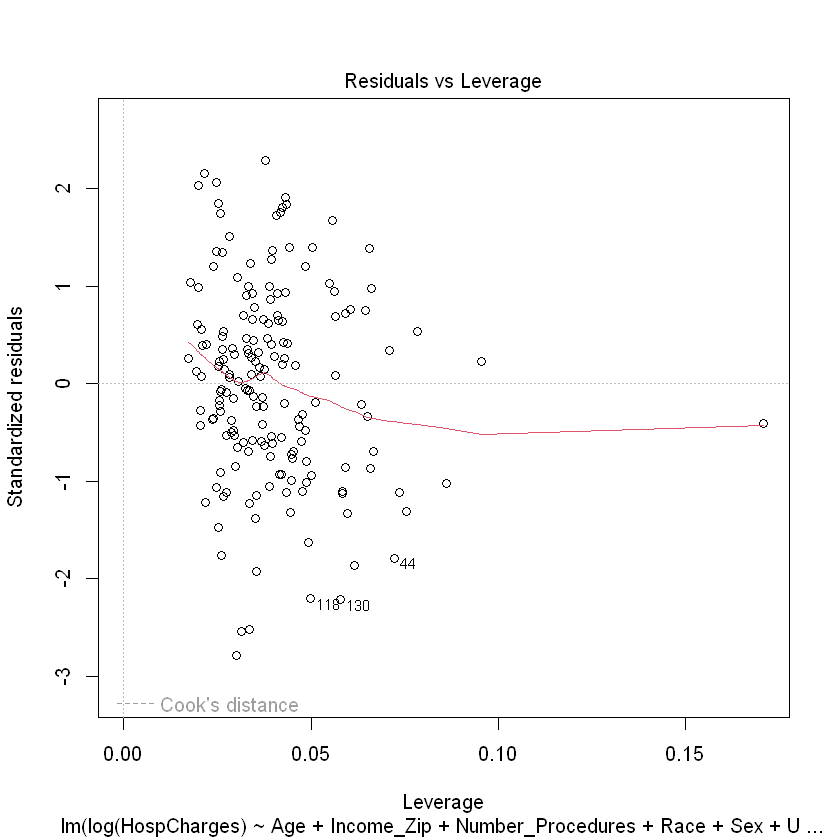

In [158]:
mod6 <- lm(log(HospCharges) ~ 
    Age + 
    Income_Zip + 
    #Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
)
summary(mod6)
data.frame(vif(mod6))
hist(residuals(mod6))
plot(mod6)

In [155]:
cor_mat(select(df, c(
    Age ,
    Income_Zip ,
    #Insurance , 
    #Number_Diagnoses , 
    Number_Procedures , 
    Race ,
    Sex ,
    Urban_Rural

)))

,rowname,Age,Income_Zip,Number_Procedures,Race,Sex,Urban_Rural
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age,1.000,0.098,-0.180,-0.230,-0.086,0.002
2,Income_Zip,0.098,1.000,-0.058,-0.045,0.075,-0.350
3,Number_Procedures,-0.180,-0.058,1.000,0.083,0.110,-0.074
4,Race,-0.230,-0.045,0.083,1.000,0.058,-0.190
5,Sex,-0.086,0.075,0.110,0.058,1.000,-0.036
6,Urban_Rural,0.002,-0.350,-0.074,-0.190,-0.036,1.000


In [157]:
cor_get_pval(cor_mat(select(df, c(
    Age ,
    Income_Zip ,
    #Insurance , 
    #Number_Diagnoses , 
    Number_Procedures , 
    Race ,
    Sex ,
    Urban_Rural

))))

rowname,Age,Income_Zip,Number_Procedures,Race,Sex,Urban_Rural
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00000,1.91e-01,0.0184,0.00211,0.249,9.79e-01
Income_Zip,0.19100,0.00e+00,0.4390,0.55300,0.320,1.51e-06
Number_Procedures,0.01840,4.39e-01,0.0000,0.27200,0.157,3.19e-01
Race,0.00211,5.53e-01,0.2720,0.00000,0.439,1.32e-02
Sex,0.24900,3.20e-01,0.1570,0.43900,0.000,6.32e-01
Urban_Rural,0.97900,1.51e-06,0.3190,0.01320,0.632,0.00e+00



Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Number_Procedures + 
    Race + Sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99082 -0.47789  0.03916  0.45502  1.59013 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.526569   0.259115  32.906  < 2e-16 ***
Age                0.018977   0.002098   9.047 3.27e-16 ***
Income_Zip        -0.001271   0.051704  -0.025   0.9804    
Number_Procedures  0.181284   0.031792   5.702 5.13e-08 ***
Race               0.240292   0.118496   2.028   0.0441 *  
Sex               -0.086642   0.111108  -0.780   0.4366    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7284 on 170 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3773,	Adjusted R-squared:  0.359 
F-statistic:  20.6 on 5 and 170 DF,  p-value: 4.69e-16


,vif.mod7.
,<dbl>
Age,1.099304
Income_Zip,1.022400
Number_Procedures,1.043985
Race,1.062924
Sex,1.019147


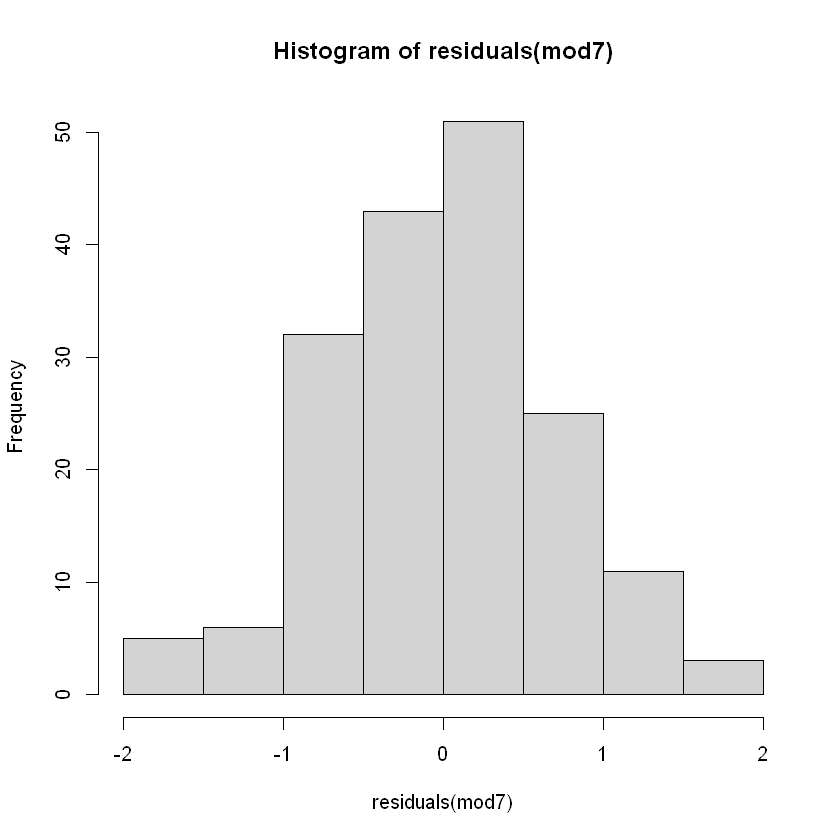

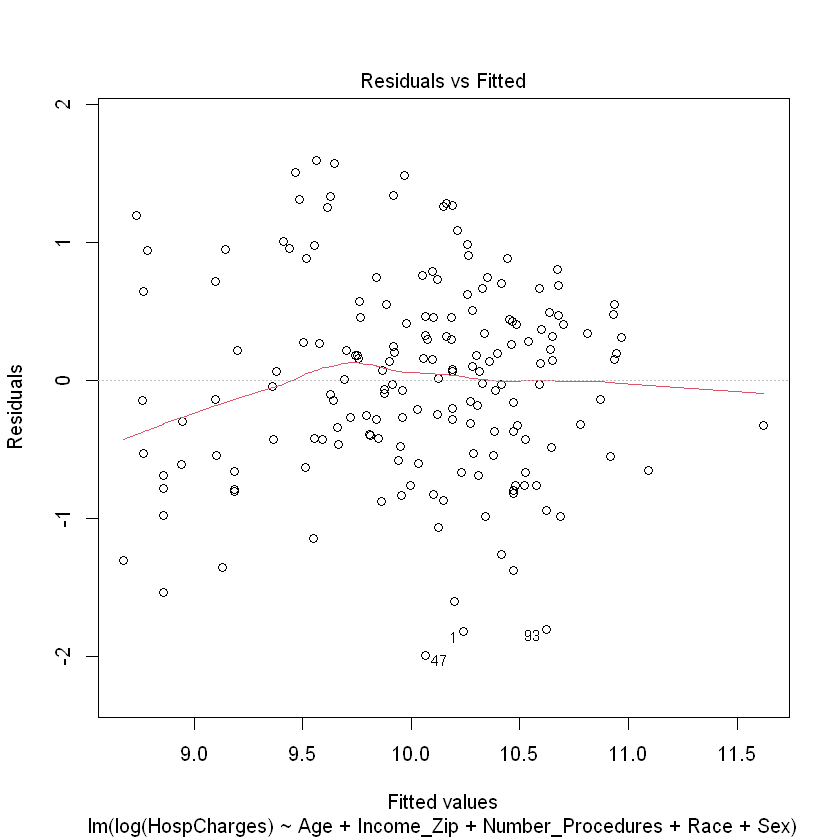

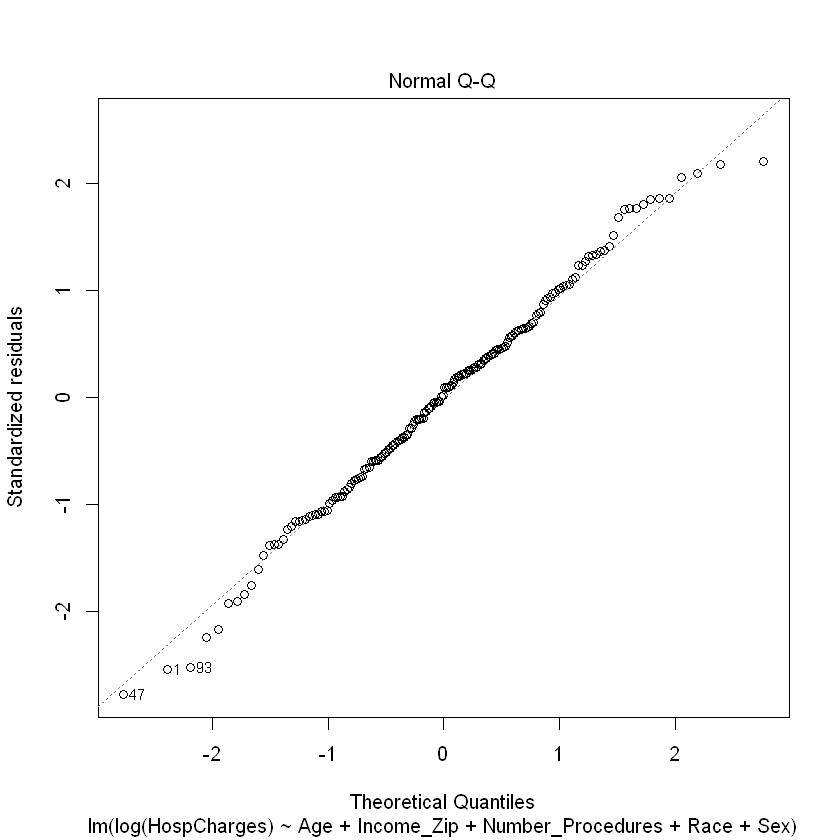

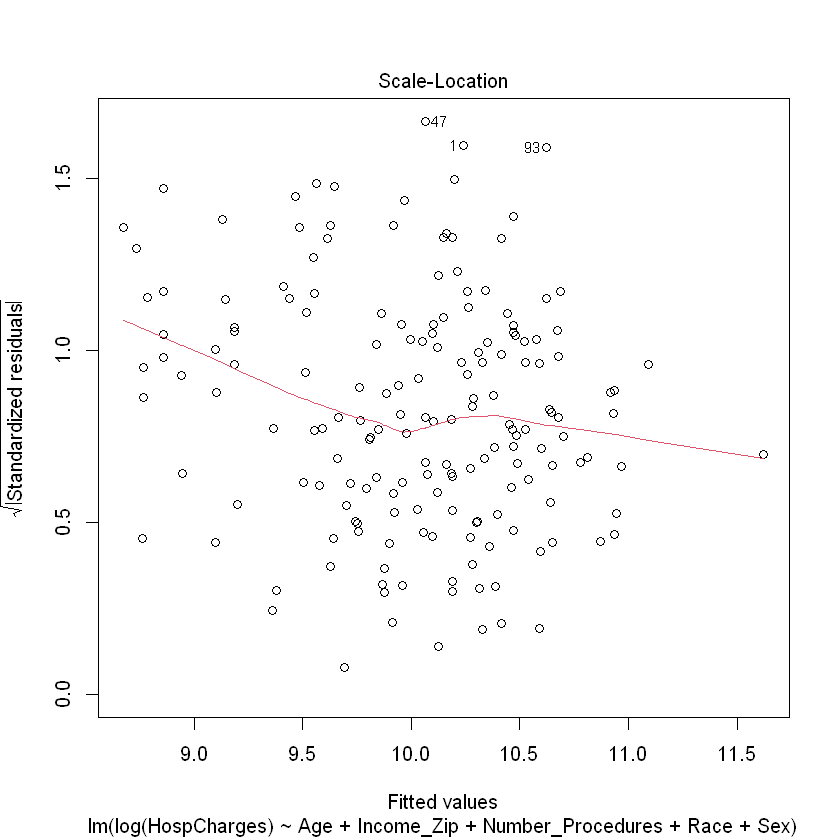

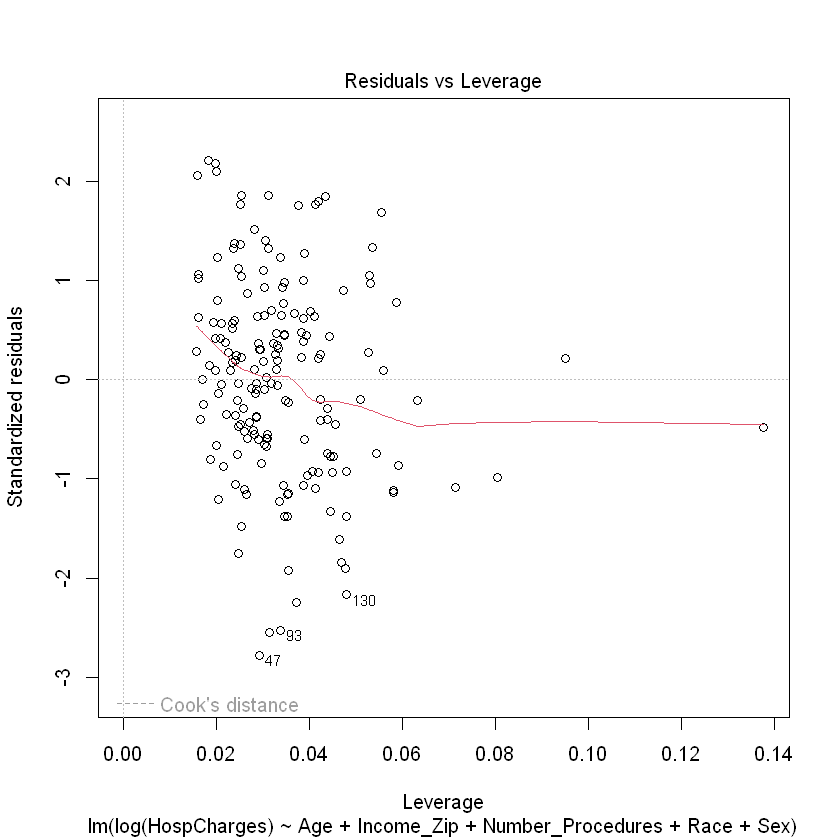

In [160]:
mod7 <- lm(log(HospCharges) ~ 
    Age + 
    Income_Zip + 
    #Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex 
    #Urban_Rural
    ,data=df
)
summary(mod7)
data.frame(vif(mod7))
hist(residuals(mod7))
plot(mod7)


Call:
lm(formula = log(HospCharges) ~ Age + Number_Procedures + Race + 
    Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99415 -0.48833  0.04408  0.46208  1.62847 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.636326   0.308569  27.988  < 2e-16 ***
Age                0.018620   0.002059   9.043 3.14e-16 ***
Number_Procedures  0.178459   0.031516   5.662 6.15e-08 ***
Race               0.225140   0.118844   1.894   0.0598 .  
Sex               -0.088753   0.109858  -0.808   0.4203    
Urban_Rural       -0.058665   0.141241  -0.415   0.6784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7256 on 172 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.3757,	Adjusted R-squared:  0.3575 
F-statistic:  20.7 on 5 and 172 DF,  p-value: 3.698e-16


,vif.mod8.
,<dbl>
Age,1.086067
Number_Procedures,1.038319
Race,1.099484
Sex,1.013682
Urban_Rural,1.042109


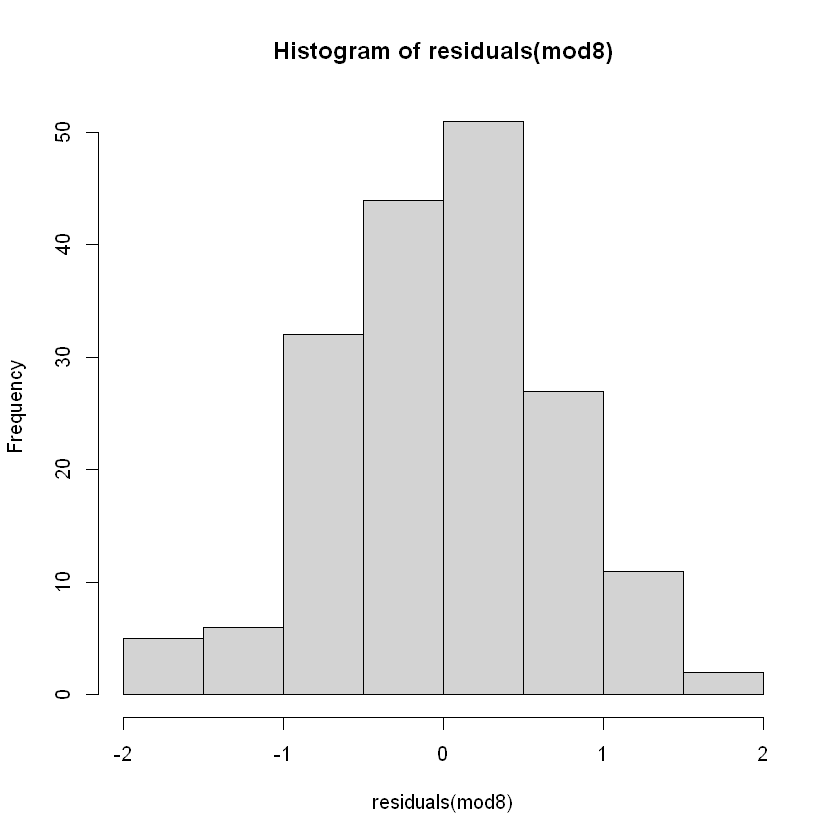

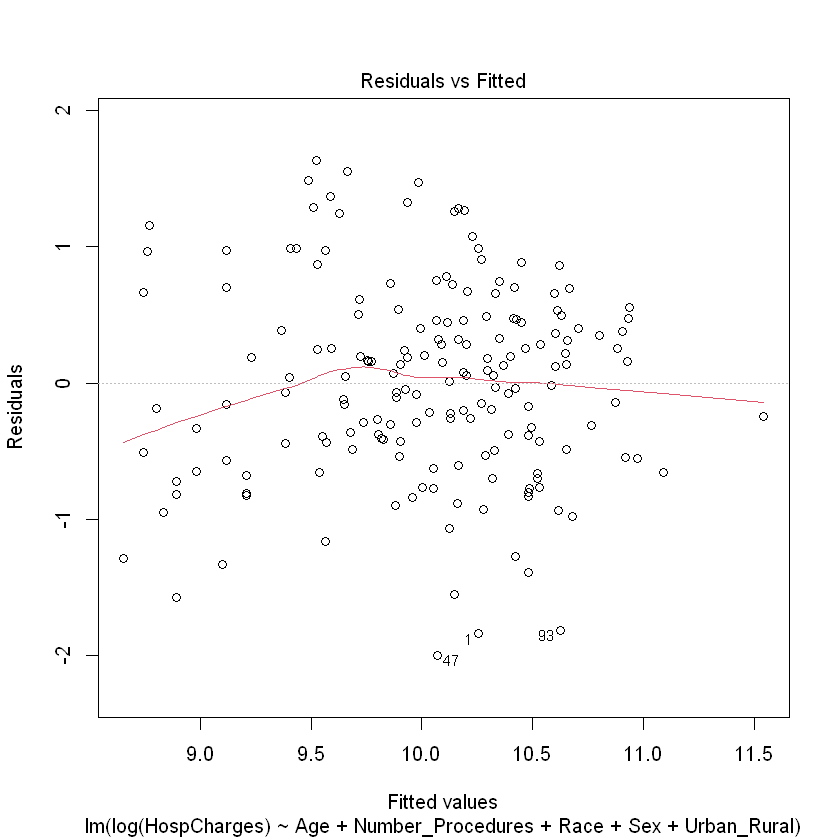

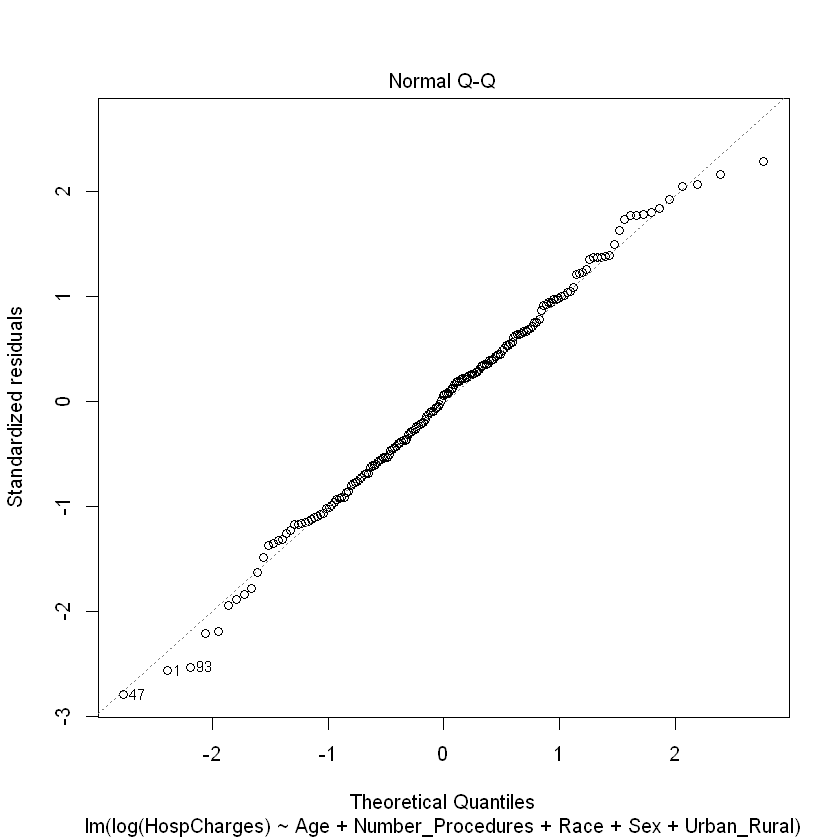

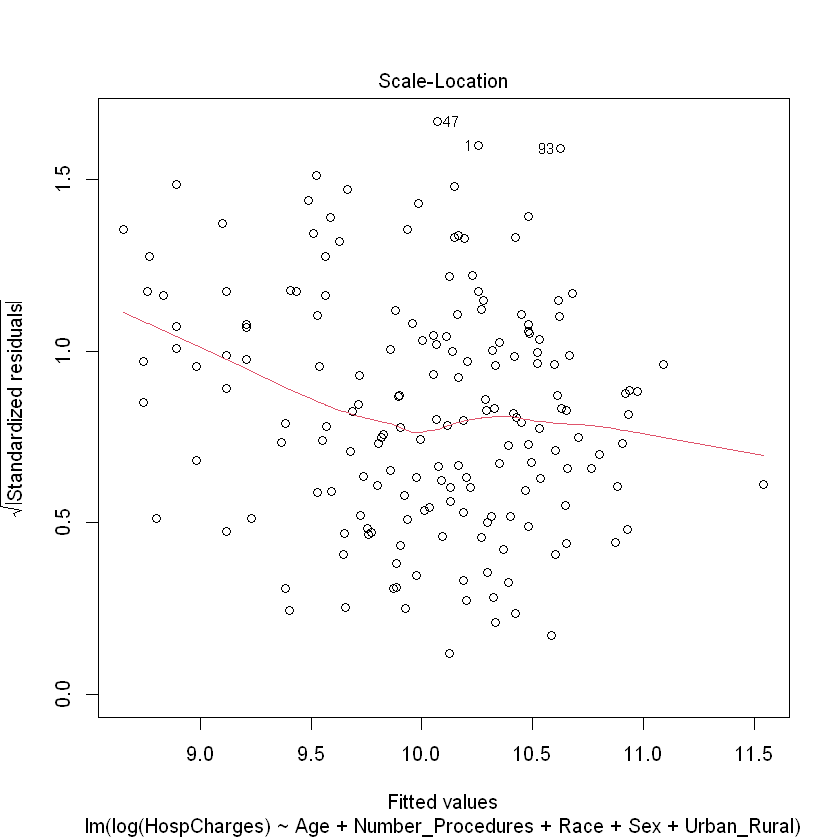

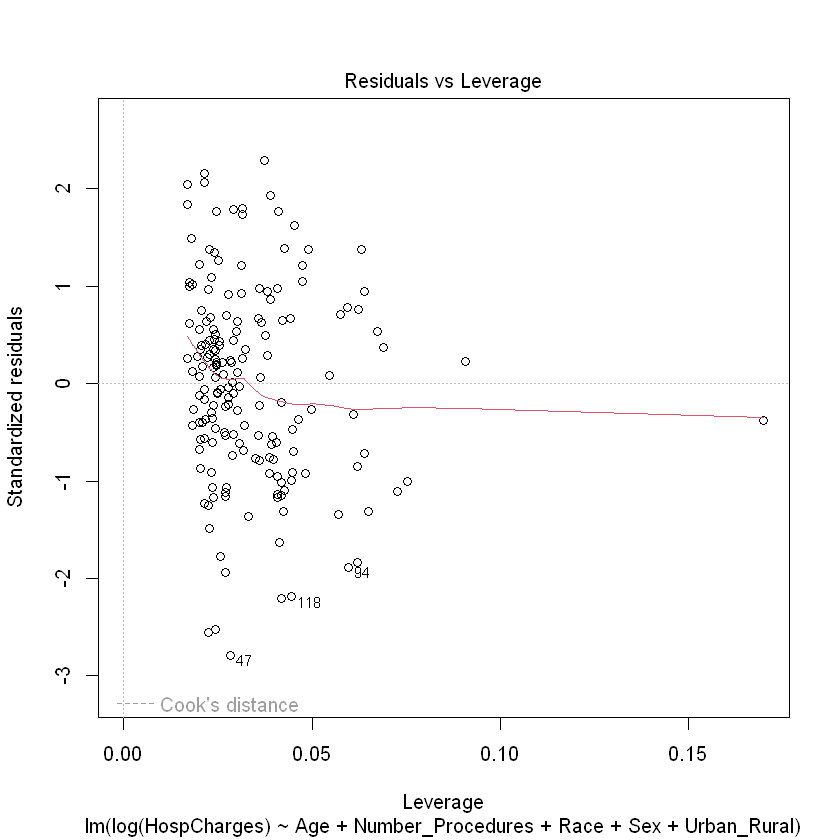

In [161]:
mod8 <- lm(log(HospCharges) ~ 
    Age + 
    #Income_Zip + 
    #Insurance + 
    #Number_Diagnoses + 
    Number_Procedures + 
    Race + 
    Sex + 
    Urban_Rural
    ,data=df
)
summary(mod8)
data.frame(vif(mod8))
hist(residuals(mod8))
plot(mod8)

In [162]:
cor_get_pval(cor_mat(select(df, c(
    Age ,
    Income_Zip ,
    #Insurance , 
    #Number_Diagnoses , 
    Number_Procedures , 
    Race ,
    Sex ,
    #Urban_Rural

))))

rowname,Age,Income_Zip,Number_Procedures,Race,Sex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.00000,0.191,0.0184,0.00211,0.249
Income_Zip,0.19100,0.000,0.4390,0.55300,0.320
Number_Procedures,0.01840,0.439,0.0000,0.27200,0.157
Race,0.00211,0.553,0.2720,0.00000,0.439
Sex,0.24900,0.320,0.1570,0.43900,0.000


In [164]:
summary(mod5)
summary(mod6)
summary(mod7)
summary(mod8)


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Insurance + 
    Number_Procedures + Race + Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01193 -0.47270  0.04177  0.47986  1.62857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.647040   0.438821  19.705  < 2e-16 ***
Age                0.019010   0.002293   8.292 3.53e-14 ***
Income_Zip        -0.013322   0.056135  -0.237   0.8127    
Insurance          0.028402   0.124916   0.227   0.8204    
Number_Procedures  0.178745   0.032164   5.557 1.06e-07 ***
Race               0.217536   0.123886   1.756   0.0809 .  
Sex               -0.077407   0.112342  -0.689   0.4918    
Urban_Rural       -0.088380   0.155548  -0.568   0.5707    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7331 on 167 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3748,	Adjusted


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Number_Procedures + 
    Race + Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00115 -0.47592  0.04616  0.46874  1.63527 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.645534   0.373423  23.152  < 2e-16 ***
Age                0.018947   0.002104   9.007 4.34e-16 ***
Income_Zip        -0.010016   0.055453  -0.181   0.8569    
Number_Procedures  0.180085   0.031982   5.631 7.34e-08 ***
Race               0.229277   0.121346   1.889   0.0605 .  
Sex               -0.085048   0.111430  -0.763   0.4464    
Urban_Rural       -0.067445   0.152110  -0.443   0.6580    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7301 on 169 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.378,	Adjusted R-squared:  0.3559 
F-statistic: 17.12 on 6 and 169 DF,  p-value: 2.059e


Call:
lm(formula = log(HospCharges) ~ Age + Income_Zip + Number_Procedures + 
    Race + Sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99082 -0.47789  0.03916  0.45502  1.59013 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.526569   0.259115  32.906  < 2e-16 ***
Age                0.018977   0.002098   9.047 3.27e-16 ***
Income_Zip        -0.001271   0.051704  -0.025   0.9804    
Number_Procedures  0.181284   0.031792   5.702 5.13e-08 ***
Race               0.240292   0.118496   2.028   0.0441 *  
Sex               -0.086642   0.111108  -0.780   0.4366    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7284 on 170 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3773,	Adjusted R-squared:  0.359 
F-statistic:  20.6 on 5 and 170 DF,  p-value: 4.69e-16



Call:
lm(formula = log(HospCharges) ~ Age + Number_Procedures + Race + 
    Sex + Urban_Rural, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99415 -0.48833  0.04408  0.46208  1.62847 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.636326   0.308569  27.988  < 2e-16 ***
Age                0.018620   0.002059   9.043 3.14e-16 ***
Number_Procedures  0.178459   0.031516   5.662 6.15e-08 ***
Race               0.225140   0.118844   1.894   0.0598 .  
Sex               -0.088753   0.109858  -0.808   0.4203    
Urban_Rural       -0.058665   0.141241  -0.415   0.6784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7256 on 172 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.3757,	Adjusted R-squared:  0.3575 
F-statistic:  20.7 on 5 and 172 DF,  p-value: 3.698e-16


In [ ]:
cor_mat(select(df, c(
    Age ,
    Income_Zip ,
    #Insurance , 
    #Number_Diagnoses , 
    Number_Procedures , 
    Race ,
    Sex ,
    Urban_Rural

)))

•	Describe how your regression meets or does not meet the assumptions of 1) no outliers in the dependent variable, 2) multicollinearity (for these purposes use a correlation coefficient of >0.500 to indicate multicollinearity even with acceptable VIF statistics), and 3) normality. 

•	Revise your regression model to address the assumptions that are not met and describe the steps you took. At the very least, the three items in the above paragraph must be addressed.  Describe how the new output differs from the original model.

---

*Is the hassle of all of this worth the effort? In other words, is (are) the new model(s) that much better than the original model? What would your approach be here?*

*How can you justify not doing any of these techniques when assumptions are violated?*